In [56]:
import os
print("📂 Current working directory:", os.getcwd())

📂 Current working directory: C:\Users\yovin


In [3]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2

# Load the pre-trained Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the result
    cv2.imshow('Face Detection', frame)

    # Exit with 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [8]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r"C:\Users\yovin\OneDrive\Documents\archive\train"
test_dir = r"C:\Users\yovin\OneDrive\Documents\archive\test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

Found 24591 images belonging to 6 classes.
Found 6347 images belonging to 6 classes.


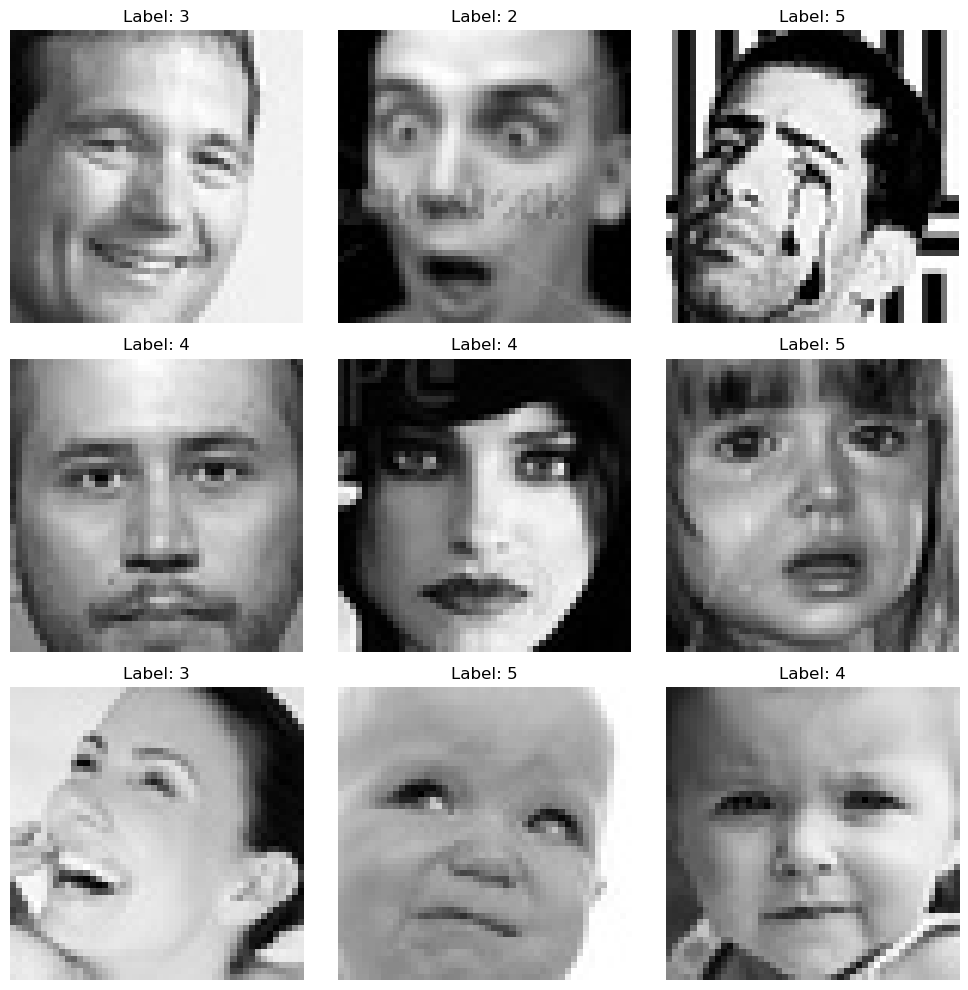

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(train_generator)

# Show 9 images from the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(48, 48), cmap='gray')
    plt.title(f"Label: {np.argmax(labels[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

# 1st conv layer
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd conv layer
model.add(Conv2D(128, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3rd conv layer
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))  # 6 emotion classes


C:\Users\yovin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.save("emotion_detection_model.h5")


In [20]:
print(train_generator.class_indices)


{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5}


In [ ]:
model.add(Dense(6, activation='softmax'))  # 6 classes only


In [22]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
from tensorflow.keras import backend as K
K.clear_session()  # This clears previous model states


In [28]:
import os

file_path = r"C:\Users\yovin\OneDrive\Documents\archive\train\neutral\Training_24187541.jpg"
os.remove(file_path)
print("File deleted.")


File deleted.


In [34]:
# Re-import if needed
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Recreate the train/test generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/yovin/OneDrive/Documents/archive/train',
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'C:/Users/yovin/OneDrive/Documents/archive/test',
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical'
)


Found 24590 images belonging to 6 classes.
Found 6347 images belonging to 6 classes.


Found 24590 images belonging to 6 classes.
Found 6347 images belonging to 6 classes.
Epoch 1/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 68s 174ms/step - accuracy: 0.2855 - loss: 1.6616 - val_accuracy: 0.3319 - val_loss: 1.5772
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3594 - loss: 1.5401 - val_accuracy: 0.3333 - val_loss: 1.5775
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 65s 170ms/step - accuracy: 0.3643 - loss: 1.5499 - val_accuracy: 0.4285 - val_loss: 1.4347
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4688 - loss: 1.3191 - val_accuracy: 0.4277 - val_loss: 1.4371
Epoch 5/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 73s 190ms/step - accuracy: 0.4447 - loss: 1.4077 - val_accuracy: 0.4618 - val_loss: 1.3572
Epoch 6/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3750 - loss: 1.4482 - val_accuracy: 0.4616 - val_loss: 1.3592
Epoch 7/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 80s 209ms/step - accuracy: 0.4701 - loss: 1.3463 - val_accuracy: 0.4825 - val_loss: 1.3068
Epoc

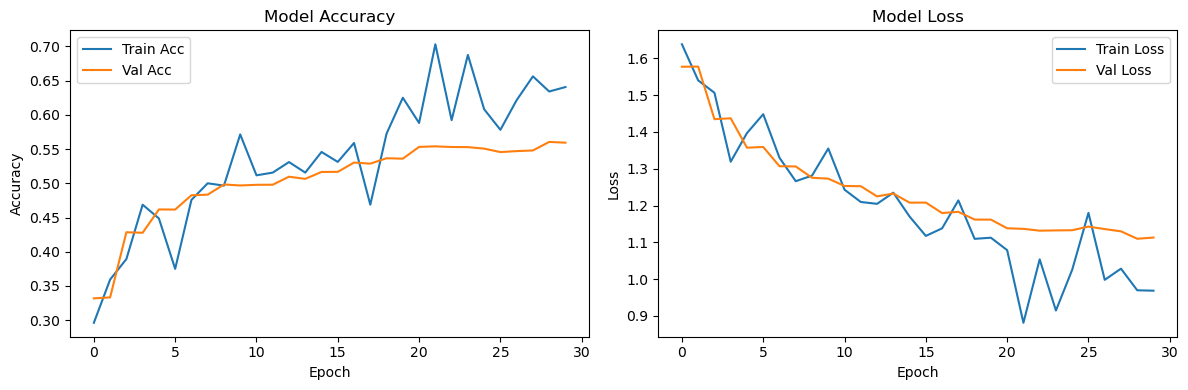

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Paths to data
train_dir = 'C:/Users/yovin/OneDrive/Documents/archive/train'
test_dir = 'C:/Users/yovin/OneDrive/Documents/archive/test'

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',  # Use grayscale for emotion detection
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

# CNN Model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Adjust to number of emotion classes
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)

# Save model using the new Keras format (.keras)
model.save('emotion_detection_model.keras')


# Plot accuracy & loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [54]:
import osdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABKQAAAGGCAYAAABFf1lKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAD0mElEQVR4nOzdd1xV9f/A8de9l70RAREBJwIqiCKuXLlypWlpVu6GlZbZ9NvU7GfTbGlLJbPUymxp5cptDhQXiuACZe+9Luf3x4WrBCjjwlV8Px+P8+Decz7nnPcBhXPe9/N5f1SKoigIIYQQQgghhBBCCNFA1MYOQAghhBBCCCGEEELcXiQhJYQQQgghhBBCCCEalCSkhBBCCCGEEEIIIUSDkoSUEEIIIYQQQgghhGhQkpASQgghhBBCCCGEEA1KElJCCCGEEEIIIYQQokFJQkoIIYQQQgghhBBCNChJSAkhhBBCCCGEEEKIBiUJKSGEEEIIIYQQQgjRoCQhJYS4rpCQEFQqFSqVih07dlTYrigKbdu2RaVS0b9/f4OeW6VS8cYbb9R4v4sXL6JSqQgJCan2PidOnEClUmFqakpcXFyNzymEEEIIYSiN+f6rrN37779fuwCFEI2GJKSEENVia2vL8uXLK6zfuXMn586dw9bW1ghRGc7XX38NQHFxMatWrTJyNEIIIYQQjf/+Swhxe5OElBCiWiZMmMD69evJzMwst3758uX07NkTT09PI0VWdwUFBXz33XcEBATg7u7OihUrjB1SlfLy8lAUxdhhCCGEEKIBNOb7LyGEkISUEKJaJk6cCMCaNWv06zIyMli/fj3Tp0+vdJ/U1FSeeOIJ3N3dMTMzo3Xr1rz88ssUFBSUa5eZmckjjzyCk5MTNjY23HXXXZw9e7bSY0ZGRvLAAw/g4uKCubk5vr6+fPbZZ3W6tl9++YWUlBQefvhhpkyZwtmzZ9mzZ0+FdgUFBSxYsABfX18sLCxwcnJiwIAB7Nu3T9+mpKSETz75hM6dO2NpaYmDgwM9evTgt99+07epqit8y5YtmTp1qv59WXf9zZs3M336dJydnbGysqKgoICoqCimTZtGu3btsLKywt3dnVGjRnHixIkKx01PT+fZZ5+ldevWmJub4+LiwvDhwzlz5gyKotCuXTuGDh1aYb/s7Gzs7e158skna/gdFUIIIYQhNOb7rxuJjo7moYceKnfODz74gJKSknLtli1bRkBAADY2Ntja2uLj48P//vc//fbc3Fyee+45WrVqhYWFBU2aNCEoKKjc91QIYRwmxg5ACHFrsLOz495772XFihU89thjgO7mSK1WM2HCBJYsWVKufX5+PgMGDODcuXPMnz8ff39/du/ezaJFiwgLC2Pjxo2ArgbCmDFj2LdvH6+99hrdunVj7969DBs2rEIM4eHh9OrVC09PTz744AOaNWvG33//zVNPPUVycjKvv/56ra5t+fLlmJub8+CDD5KamsqiRYtYvnw5d9xxh75NcXExw4YNY/fu3cyZM4c777yT4uJi/v33X6Kjo+nVqxcAU6dOZfXq1cyYMYMFCxZgZmbGkSNHuHjxYq1iA5g+fTojRozg22+/JScnB1NTU2JjY3FycuLtt9/G2dmZ1NRUvvnmG7p3787Ro0dp3749AFlZWdxxxx1cvHiRF198ke7du5Odnc2uXbuIi4vDx8eH2bNnM2fOHCIjI2nXrp3+vKtWrSIzM1MSUkIIIYSRNOb7r+tJSkqiV69eFBYW8uabb9KyZUv++OMPnnvuOc6dO8fSpUsBWLt2LU888QSzZ8/m/fffR61WExUVRXh4uP5Yc+fO5dtvv2XhwoUEBgaSk5PDyZMnSUlJMXjcQogaUoQQ4jpWrlypAMqhQ4eUf/75RwGUkydPKoqiKN26dVOmTp2qKIqidOjQQenXr59+v88//1wBlB9++KHc8d555x0FUDZv3qwoiqL8+eefCqB89NFH5dq99dZbCqC8/vrr+nVDhw5VWrRooWRkZJRrO2vWLMXCwkJJTU1VFEVRLly4oADKypUrb3h9Fy9eVNRqtXL//ffr1/Xr10+xtrZWMjMz9etWrVqlAMpXX31V5bF27dqlAMrLL7983XP+97rKeHl5KVOmTNG/L/veT548+YbXUVxcrBQWFirt2rVTnnnmGf36BQsWKICyZcuWKvfNzMxUbG1tlaeffrrcej8/P2XAgAE3PLcQQgghDKsx33+VtXvvvfeqbPPSSy8pgHLgwIFy6x9//HFFpVIpERER+hgcHByue76OHTsqY8aMuW4bIYRxyJA9IUS19evXjzZt2rBixQpOnDjBoUOHquwuvn37dqytrbn33nvLrS8bkrZt2zYA/vnnHwAefPDBcu0eeOCBcu/z8/PZtm0b99xzD1ZWVhQXF+uX4cOHk5+fz7///lvja1q5ciUlJSXlrmP69Onk5OSwbt06/bo///wTCwuLKq+3rA1g8B5F48aNq7CuuLiY//u//8PPzw8zMzNMTEwwMzMjMjKS06dPl4vJ29ubQYMGVXl8W1tbpk2bRkhICDk5OYDu5xceHs6sWbMMei1CCCGEqJnGeP91I9u3b8fPz4/g4OAK16EoCtu3bwcgODiY9PR0Jk6cyK+//kpycnKFYwUHB/Pnn3/y0ksvsWPHDvLy8gwerxCidiQhJYSoNpVKxbRp01i9ejWff/453t7e9OnTp9K2KSkpNGvWDJVKVW69i4sLJiYm+m7SKSkpmJiY4OTkVK5ds2bNKhyvuLiYTz75BFNT03LL8OHDASq9CbmekpISQkJCaN68OV27diU9PZ309HQGDRqEtbV1uVltkpKSaN68OWp11b82k5KS0Gg0FWKvKzc3twrr5s6dy6uvvsqYMWP4/fffOXDgAIcOHSIgIKDcjVZSUhItWrS44Tlmz55NVlYW3333HQCffvopLVq0YPTo0Ya7ECGEEELUWGO7/6qOlJSUSu9/mjdvrt8OMGnSJFasWMGlS5cYN24cLi4udO/enS1btuj3+fjjj3nxxRf55ZdfGDBgAE2aNGHMmDFERkYaPG4hRM1IQkoIUSNTp04lOTmZzz//nGnTplXZzsnJiYSEhAozwiUmJlJcXEzTpk317YqLiyuM44+Pjy/33tHREY1Gw9SpUzl06FClS9mNUXVt3bqVS5cu6esxOTo64ujoiLu7Ozk5Ofz777/6GgTOzs7ExsZWKKR5LWdnZ7RabYXY/8vc3LxCYVGgyloG/72pBFi9ejWTJ0/m//7v/xg6dCjBwcEEBQVVuCl0dnbm8uXL140HoG3btgwbNozPPvuMmJgYfvvtN2bOnIlGo7nhvkIIIYSoX43p/qs6nJyciIuLq7A+NjYWQH8dANOmTWPfvn1kZGSwceNGFEVh5MiRXLp0CQBra2vmz5/PmTNniI+PZ9myZfz777+MGjXK4HELIWpGElJCiBpxd3fn+eefZ9SoUUyZMqXKdgMHDiQ7O5tffvml3PpVq1bptwMMGDAAQN8zp8z3339f7r2VlRUDBgzg6NGj+Pv7ExQUVGH576d8N7J8+XLUajW//PIL//zzT7nl22+/BWDFihUADBs2jPz8fEJCQqo8Xlkh0GXLll33vC1btuT48ePl1m3fvp3s7Oxqx65SqTA3Ny+3buPGjVy5cqVCTGfPntV3bb+ep59+muPHjzNlyhQ0Gg2PPPJIteMRQgghRP1pTPdf1TFw4EDCw8M5cuRIhetQqVT6+K9lbW3NsGHDePnllyksLOTUqVMV2ri6ujJ16lQmTpxIREQEubm5Bo9dCFF9MsueEKLG3n777Ru2mTx5Mp999hlTpkzh4sWLdOrUiT179vB///d/DB8+XF/TaMiQIfTt25cXXniBnJwcgoKC2Lt3rz4hdK2PPvqIO+64gz59+vD444/TsmVLsrKyiIqK4vfff69W0qVMSkoKv/76K0OHDq1yWNqHH37IqlWrWLRoERMnTmTlypXMnDmTiIgIBgwYQElJCQcOHMDX15f777+fPn36MGnSJBYuXEhCQgIjR47E3Nyco0ePYmVlxezZswFd9/JXX32V1157jX79+hEeHs6nn36Kvb19teMfOXIkISEh+Pj44O/vT2hoKO+9916F4Xlz5sxh3bp1jB49mpdeeong4GDy8vLYuXMnI0eOLHdDN3jwYPz8/Pjnn3/00ywLIYQQ4ubQGO6/rnXixAl++umnCuu7devGM888w6pVqxgxYgQLFizAy8uLjRs3snTpUh5//HG8vb0BeOSRR7C0tKR37964ubkRHx/PokWLsLe3p1u3bgB0796dkSNH4u/vj6OjI6dPn+bbb7+lZ8+eWFlZ1Sp2IYSBGLemuhDiZnftLC/X899ZXhRFUVJSUpSZM2cqbm5uiomJieLl5aXMmzdPyc/PL9cuPT1dmT59uuLg4KBYWVkpgwcPVs6cOVPpbHQXLlxQpk+frri7uyumpqaKs7Oz0qtXL2XhwoXl2nCDWV6WLFmiAMovv/xSZZuymWrWr1+vKIqi5OXlKa+99prSrl07xczMTHFyclLuvPNOZd++ffp9tFqt8uGHHyodO3ZUzMzMFHt7e6Vnz57K77//rm9TUFCgvPDCC4qHh4diaWmp9OvXTwkLC6tylr3KvvdpaWnKjBkzFBcXF8XKykq54447lN27dyv9+vWr8HNIS0tTnn76acXT01MxNTVVXFxclBEjRihnzpypcNw33nhDAZR///23yu+LEEIIIepXY73/urZdVUvZ/pcuXVIeeOABxcnJSTE1NVXat2+vvPfee4pWq9Uf65tvvlEGDBiguLq6KmZmZkrz5s2V8ePHK8ePH9e3eemll5SgoCDF0dFRMTc3V1q3bq0888wzSnJy8nXjFELUP5Wi/GeAsRBCiNtWUFAQKpWKQ4cOGTsUIYQQQgghRCMmQ/aEEOI2l5mZycmTJ/njjz8IDQ1lw4YNxg5JCCGEEEII0chJQkoIIW5zR44cYcCAATg5OfH6668zZswYY4ckhBBCCCGEaORkyJ4QQgghhBBCCCGEaFBqYwcghBBCCCGEEEIIIW4vkpASQgghhBBCCCGEEA1KElJCCCGEEEIIIYQQokFJUfNKlJSUEBsbi62tLSqVytjhCCGEEMLIFEUhKyuL5s2bo1bL53kg90tCCCGEKK+m90uSkKpEbGwsHh4exg5DCCGEEDeZmJgYWrRoYewwbgpyvySEEEKIylT3fkkSUpWwtbUFdN9EOzs7I0cjhBBCCGPLzMzEw8NDf48g5H5JCCGEEOXV9H5JElKVKOt2bmdnJzdYQgghhNCToWlXyf2SEEIIISpT3fslKYIghBBCCCGEEEIIIRqUJKSEEEIIIYQQQgghRIOShJQQQgghhBBCCCGEaFBSQ6oOtFotRUVFxg5D1ICpqSkajcbYYQghhBBCCCHEbUOenRsHQz9PS0KqFhRFIT4+nvT0dGOHImrBwcGBZs2aSWFaIYQQQgghhKhH8uzc+BjyeVoSUrVQ9h/KxcUFKysrSWzcIhRFITc3l8TERADc3NyMHJEQQgghhBBCNF7y7Nx41MfztCSkakir1er/Qzk5ORk7HFFDlpaWACQmJuLi4iLD94QQQgghhBCiHsizc+Nj6OdpKWpeQ2XjXq2srIwciaitsp+djGEWQgghhBBCiPohz86NkyGfpyUhVUvS1fDWJT87IYQQQgghhGgY8vzVuBjy52n0hNTSpUtp1aoVFhYWdO3ald27d1fZdurUqahUqgpLhw4dyrVbv349fn5+mJub4+fnx4YNG+r7MoQQQgghhIEVaUuMHYIQQggh6olRE1Lr1q1jzpw5vPzyyxw9epQ+ffowbNgwoqOjK23/0UcfERcXp19iYmJo0qQJ9913n77N/v37mTBhApMmTeLYsWNMmjSJ8ePHc+DAgYa6rNtK//79mTNnjrHDEELcxvadS2b2mqOk5RQaOxQhhIGcS8rm4W8O8ciqw8YORQghhKgzeW6unFETUosXL2bGjBk8/PDD+Pr6smTJEjw8PFi2bFml7e3t7WnWrJl+OXz4MGlpaUybNk3fZsmSJQwePJh58+bh4+PDvHnzGDhwIEuWLGmgq7o5Vdaz7Npl6tSptTruzz//zJtvvmmQGPft24dGo+Guu+4yyPGEELeHD7ec5fdjsaw5VPmHGUKIW4+ZRs32M4nsiEgiIj7L2OEIIYS4TdzMz81Tp05lzJgxdTrGzcZoCanCwkJCQ0MZMmRIufVDhgxh37591TrG8uXLGTRoEF5eXvp1+/fvr3DMoUOHXveYBQUFZGZmllsam2t7li1ZsgQ7O7ty6z766KNy7atboKxJkybY2toaJMYVK1Ywe/Zs9uzZU2UvOSGEuFaxtoQTVzIACItON24wQgiD8WhixV0dmwHw9e7zRo5GCCHE7eJWeG5uTIyWkEpOTkar1eLq6lpuvaurK/Hx8TfcPy4ujj///JOHH3643Pr4+PgaH3PRokXY29vrFw8Pjxpcya3h2p5l9vb2qFQq/fv8/HwcHBz44Ycf6N+/PxYWFqxevZqUlBQmTpxIixYtsLKyolOnTqxZs6bccf/b9bBly5b83//9H9OnT8fW1hZPT0++/PLLG8aXk5PDDz/8wOOPP87IkSMJCQmp0Oa3334jKCgICwsLmjZtytixY/XbCgoKeOGFF/Dw8MDc3Jx27dqxfPnyWn+/hBC3hsjEbPKLdDVmwmLSURTFyBEJIQzl4T6tAfgl7AqJmflGjkYIIcTt4GZ/br6enTt3EhwcjLm5OW5ubrz00ksUFxfrt//000906tQJS0tLnJycGDRoEDk5OQDs2LGD4OBgrK2tcXBwoHfv3ly6dKlO8VSH0Yua/7dCu6Io1araHhISgoODQ6Vd1mp6zHnz5pGRkaFfYmJiqhf8NcfPLSw2ymLIh68XX3yRp556itOnTzN06FDy8/Pp2rUrf/zxBydPnuTRRx9l0qRJN6zH9cEHHxAUFMTRo0d54oknePzxxzlz5sx191m3bh3t27enffv2PPTQQ6xcubLctW3cuJGxY8cyYsQIjh49yrZt2wgKCtJvnzx5MmvXruXjjz/m9OnTfP7559jY2NTtGyKEuOmduJyhf52YVUBchjy0CtFYdPF0pKuXI0VahW/2XzR2OEIIIepInpvLq81zc1WuXLnC8OHD6datG8eOHWPZsmUsX76chQsXAroOPRMnTmT69OmcPn2aHTt2MHbsWBRFobi4mDFjxtCvXz+OHz/O/v37efTRRxtkdkSTej9DFZo2bYpGo6nQcykxMbFCD6f/UhSFFStWMGnSJMzMzMpta9asWY2PaW5ujrm5eQ2v4Kq8Ii1+r/1d6/3rInzBUKzMDPNjnDNnTrleRwDPPfec/vXs2bP566+/+PHHH+nevXuVxxk+fDhPPPEEoPvP+uGHH7Jjxw58fHyq3Gf58uU89NBDANx1111kZ2ezbds2Bg0aBMBbb73F/fffz/z58/X7BAQEAHD27Fl++OEHtmzZom/funXrmly6EOIWdexyevn3Mek0d7A0TjBCCIN7pE9rQi+FsvrfaJ4c0NZg9zxCCCEanjw3l1eb5+aqLF26FA8PDz799FNUKhU+Pj7Exsby4osv8tprrxEXF0dxcTFjx47Vlzzq1KkTAKmpqWRkZDBy5EjatGkDgK+vb41jqA2j9ZAyMzOja9eubNmypdz6LVu20KtXr+vuu3PnTqKiopgxY0aFbT179qxwzM2bN9/wmIJyPY4AtFotb731Fv7+/jg5OWFjY8PmzZtvWN/J399f/7qsi2NiYmKV7SMiIjh48CD3338/ACYmJkyYMIEVK1bo24SFhTFw4MBK9w8LC0Oj0dCvX78bXqMQonE5XtpDytlW96FCWEy6EaMRQhjaYD9XvJysyMgr4qfQy8YORwghhDDac/P1nD59mp49e5br1dS7d2+ys7O5fPkyAQEBDBw4kE6dOnHffffx1VdfkZaWBujqW02dOpWhQ4cyatQoPvroI+Li4moVR00Z9WOmuXPnMmnSJIKCgujZsydffvkl0dHRzJw5E9ANpbty5QqrVq0qt9/y5cvp3r07HTt2rHDMp59+mr59+/LOO+8wevRofv31V7Zu3cqePXvq7TosTTWELxhab8e/0bkNxdrautz7Dz74gA8//JAlS5bQqVMnrK2tmTNnDoWF159a3dTUtNx7lUpFSUlJle2XL19OcXEx7u7u+nWKomBqakpaWhqOjo5YWlbd4+F624QQjVdBsZYz8bpJKB4I9uSjbZEclYSUEI2KRq1ixh2teO3XUyzfc4EHu3uhUdf/EAIhhBCGJ8/N5dX0ufl6KitTVDZMUaVSodFo2LJlC/v27WPz5s188sknvPzyyxw4cIBWrVqxcuVKnnrqKf766y/WrVvHK6+8wpYtW+jRo0et4qkuo9aQmjBhAkuWLGHBggV07tyZXbt2sWnTJn0Xsri4uApZxYyMDNavX19p7yiAXr16sXbtWlauXIm/vz8hISGsW7fuul3l6kqlUmFlZmKUpT7Hde7evZvRo0fz0EMPERAQQOvWrYmMjDToOYqLi1m1ahUffPABYWFh+uXYsWN4eXnx3XffAbrs8bZt2yo9RqdOnSgpKWHnzp0GjU0IcXM7HZdFkVahibUZI/3dAF1NqWJt7f6QCyFuTvd2bYG9pSmXUnLZEn7jiW+EEELcnOS5uf74+fmxb9++crWy9u3bh62trb7jh0qlonfv3syfP5+jR49iZmbGhg0b9O0DAwOZN28e+/bto2PHjnz//ff1HrfRB+I/8cQT+nGT/1XZTGv29vbk5uZe95j33nsv9957ryHCu621bduW9evXs2/fPhwdHVm8eDHx8fEGHU/6xx9/kJaWxowZM7C3ty+37d5772X58uXMmjWL119/nYEDB9KmTRvuv/9+iouL+fPPP3nhhRdo2bIlU6ZMYfr06Xz88ccEBARw6dIlEhMTGT9+vMFiFULcXI6X1o/q5G5PG2cbbM1NyCoo5mxCNn7N7YwbnBDCYKzMTHiohyef/XOOr3Zf4K6ObsYOSQghhNBriOfmMhkZGYSFhZVb16RJE5544gmWLFnC7NmzmTVrFhEREbz++uvMnTsXtVrNgQMH2LZtG0OGDMHFxYUDBw6QlJSEr68vFy5c4Msvv+Tuu++mefPmREREcPbsWSZPnmzw+P/L6LPsiZvXq6++SpcuXRg6dCj9+/enWbNmlc5qWBfLly9n0KBBFZJRAOPGjSMsLIwjR47Qv39/fvzxR3777Tc6d+7MnXfeWW7WgmXLlnHvvffyxBNP4OPjwyOPPKKfwlII0Tgdi9HVjwpoYY9arcLfQ/d7ROpICdH4TOnZEjONmtBLaRyJTjN2OEIIIYReQzw3l9mxYweBgYHlltdeew13d3c2bdrEwYMHCQgIYObMmcyYMYNXXnkFADs7O3bt2sXw4cPx9vbmlVde4YMPPmDYsGFYWVlx5swZxo0bh7e3N48++iizZs3iscceq5druJZKMeT8h41EZmYm9vb2ZGRkYGdX/lP2/Px8Lly4QKtWrbCwsDBShKIu5GcoROMwePFOIhOz+XpyEIP8XHn3rzMs3XGO8UEtePfegAaLIyOviOEf7aZ9M1tWTO3WYOcVDet69wY3g127dvHee+8RGhpKXFwcGzZsuOHNcEFBAQsWLGD16tXEx8fTokULXn75ZaZPn16tczb09+T5H4/xY+hlhndqxtIHu9b7+YQQQtSNPHc1Ttf7udb03sDoQ/aEEEKImsouKCYqKRtA3zOqs4cDcLXnVEPZE5nMlfQ8rqTnEZOai0cTqwY9vxAAOTk5BAQEMG3aNMaNG1etfcaPH09CQgLLly+nbdu2JCYmUlxcXM+R1t7DfVrzY+hl/joZT3RKLp5O8n9NCCGEuJVJQkoIIcQt59SVDBQF3OwtcLHVfTLT2dMBgLOJWWQXFGNj3jB/4v49n6J/ve10AlN7t2qQ8wpxrWHDhjFs2LBqt//rr7/YuXMn58+fp0mTJgC0bNmynqIzjPbNbOnr7cyus0ms2HuBN+7uYOyQhBBCCFEHUkNKCCHELef4ZV0vKP8WV+vPudha4O5giaJcLXjeEMolpM4kNth5haiL3377jaCgIN59913c3d3x9vbmueeeIy8vr8p9CgoKyMzMLLc0tEf66BK+PxyOISO3qMHPL4QQQgjDkYSUEEKIW86x0oSTfwuHcuvLhu01VGHz5OwCIhOz9e//PZ9CVr48JIub3/nz59mzZw8nT55kw4YNLFmyhJ9++oknn3yyyn0WLVqEvb29fvHw8GjAiHXuaNsUn2a25BZq+e7gpQY/vxBCCCEMRxJSQgghbjllPaQCqkpIRac3SBwHzqcC4NPMllZNrSnSKuyJTG6QcwtRFyUlJahUKr777juCg4MZPnw4ixcvJiQkpMpeUvPmzSMjI0O/xMTENHDUoFKpeKRPawC+2XeRwuKSBo9BCCGEEIYhCSkhhBC3lLScQqJTcwHodM2QPbhaRyosJp2GmES2bLhej9ZODPRxAWDraRm2J25+bm5uuLu7Y29/9f+Qr68viqJw+fLlSvcxNzfHzs6u3GIMowKa42pnTkJmAb8fizVKDEIIIYSoO0lICSGEuKUcv6LrHdWqqTX2lqbltnVsbo9GrSIxq4C4jPx6j+XahNSdvrqE1D8RiWhL6j8ZJkRd9O7dm9jYWLKzrw45PXv2LGq1mhYtWhgxshszM1EzpVdLAL7afb5Bks9CCCGEMDxJSAkhhLilHC+tD9XJ3b7CNkszDe1dbYH6ryN1bf2o7q2a0K1lE2wtTEjNKWywGlZClMnOziYsLIywsDAALly4QFhYGNHR0YBuuN3kyZP17R944AGcnJyYNm0a4eHh7Nq1i+eff57p06djaWlpjEuokQeDvbAy03AmPos9UTJMVgghhLgVSUJKCCHELeVYJTPsXats2N6xek4KHbxwtX6Uo7UZpho1/dvrekltO51Qr+cW4r8OHz5MYGAggYGBAMydO5fAwEBee+01AOLi4vTJKQAbGxu2bNlCeno6QUFBPPjgg4waNYqPP/7YKPHXlL2VKeODdEXVv9p9wcjRCCGEEKI2JCElaqR///7MmTPH2GEIIW5jx0tn2AsoLWD+X2WFzY/Wc0Lq2uF6ZcrqSG2TOlKigfXv3x9FUSosISEhAISEhLBjx45y+/j4+LBlyxZyc3OJiYnhgw8+uCV6R5WZ3rsVahXsOptERHyWscMRQggh9OS5uXpMjB2AaBijRo0iLy+PrVu3Vti2f/9+evXqRWhoKF26dDHI+fLy8mjevDkqlYorV67cUje4QoibV3xGPolZBahV0KF55QWVA0sTUicuZ1CsLcFEUz+fvVSWkOrf3hmNWkVEQhYxqbl4NLGql3ML0egV5sKFnaCU6JYS7dXXigJKCZ6Kljc8znPySjrHfz1K+67NS9spV9s6eILvSGNfjRBCiFtEQz03h4SEMGfOHNLT0+t0nFudJKRuEzNmzGDs2LFcunQJLy+vcttWrFhB586dDZaMAli/fj0dO3ZEURR+/vlnHnzwQYMdWwhx+yrrHeXtaouVWeV/wto422BrbkJWQTFnE7LxqyJxVRfJ2QWcTdDVjwpu1US/3sHKjK5ejhy8kMr2M4n6wstCiBrKSYI199+w2WQAUyAO+KOKRtM3g2d3w8UmhBCi0Wro5+bbnQzZu02MHDkSFxcXfdf9Mrm5uaxbt44ZM2aQkpLCxIkTadGiBVZWVnTq1Ik1a9bU6nzLly/noYce4qGHHmL58uUVtp86dYoRI0ZgZ2eHra0tffr04dy5c/rtK1asoEOHDpibm+Pm5sasWbNqFYcQonE5foP6UQBqtQp/D932+ioufm39qCbWZuW2DSqdbW+r1JESovZMLMA9CFoEg0cP8OwFXndAq77Quj+0uRPaDoJ2Qzhk1p3N2q6cbdIffO8GvzHQYSw0ba871unfjHghQgghbiUN/dxclejoaEaPHo2NjQ12dnaMHz+ehISr95bHjh1jwIAB2NraYmdnR9euXTl8+DAAly5dYtSoUTg6OmJtbU2HDh3YtGmTQeMzFOkhZQiKAkW5xjm3qRWoVDdsZmJiwuTJkwkJCeG1115DVbrPjz/+SGFhIQ8++CC5ubl07dqVF198ETs7OzZu3MikSZNo3bo13btX/5PFc+fOsX//fn7++WcURWHOnDmcP3+e1q1bA3DlyhX69u1L//792b59O3Z2duzdu5fi4mIAli1bxty5c3n77bcZNmwYGRkZ7N27txbfHCFEY3OstIeUfwuH67br7OHA3qgUwmLSeKC7p8HjqGy4Xpk7fVz5v01nOHA+leyCYmzM5U+tEDVm6wqPbKtW05STccxcfQT7NFP2z7zzau/J8F/hh8lwZiMMWVit+yUhhBD1SJ6bq0VRFMaMGYO1tTU7d+6kuLiYJ554ggkTJujrQT744IMEBgaybNkyNBoNYWFhmJqaAvDkk09SWFjIrl27sLa2Jjw8HBsbmzrHVR/kLtkQinLh/5ob59z/iwUz62o1nT59Ou+99x47duxgwIABgK4n0tixY3F0dMTR0ZHnnntO33727Nn89ddf/PjjjzX6j7VixQqGDRuGo6MjAHfddRcrVqxg4cKFAHz22WfY29uzdu1a/X8ab29v/f4LFy7k2Wef5emnn9av69atW7XPL4RonBRF4cQVXQ+pgBsmpHS/f+qrh9TVhFSTCtvaOFvT0smKiym57IlM4q6ObvUSgxBCZ7BfM7ycrLiUkstPoZeZ3LOlbkObgaAxh7QLkHQGXHyNGqcQQtz25Lm5WrZu3crx48e5cOECHh66GWW//fZbOnTowKFDh+jWrRvR0dE8//zz+Pj4ANCuXTv9/tHR0YwbN45OnToB6DuG3IxkyN5txMfHh169erFixQpA15Np9+7dTJ8+HQCtVstbb72Fv78/Tk5O2NjYsHnz5nLTRN+IVqvlm2++4aGHHtKve+ihh/jmm2/QarUAhIWF0adPH30y6lqJiYnExsYycODAulyqEKIRik7NJT23CDONmvbNbK/bNqB0yF5kYjbZBcUGjSOlXP2oij2kVCoVA31dAdgqs+0JUe80ahXTe7cC4OvdF9CWKLoN5jbQup/u9ZmNRopOCCHEraYhnpuv5/Tp03h4eOiTUQB+fn44ODhw+vRpAObOncvDDz/MoEGDePvtt8uVv3nqqadYuHAhvXv35vXXX+f48eMGias+SA8pQzC10mVcjXXuGpgxYwazZs3is88+Y+XKlXh5eemTPx988AEffvghS5YsoVOnTlhbWzNnzhwKCwurffy///6bK1euMGHChHLrtVotmzdvZtiwYdedcU9m4xNCVOVYaf0o3+Z2mJlc//MUF1sL3B0suZKex/HL6fRq09RgcVyvflSZgT4uLN9zgX/OJKItUdCoZaiQEPXpvqAWLN5ylujUXLaEx1/tmdh+OERuhohN0Pe56x9ECCFE/ZLn5mpRFEU/VLCq9W+88QYPPPAAGzdu5M8//+T1119n7dq13HPPPTz88MMMHTqUjRs3snnzZhYtWsQHH3zA7NmzDRKfIUkPKUNQqXTd/4yx1LAewvjx49FoNHz//fd88803TJs2Tf+Pevfu3YwePZqHHnqIgIAAWrduTWRkZI2Ov3z5cu6//37CwsLKLQ8++KC+uLm/vz+7d++mqKiowv62tra0bNmSbduqVzdCCHH7OF46/M7fveqC5tfq7OEAGH7Y3vXqR5Xp1qoJthYmpOQU6uteCSHqj5WZCQ/10NWL+2r3hasb2g/Tfb0SCplxRohMCCGEnjw3V4ufnx/R0dHExMTo14WHh5ORkYGv79Xh597e3jzzzDNs3ryZsWPHsnLlSv02Dw8PZs6cyc8//8yzzz7LV199ZbD4DEkSUrcZGxsbJkyYwP/+9z9iY2OZOnWqflvbtm3ZsmUL+/bt4/Tp0zz22GPEx8dX+9hJSUn8/vvvTJkyhY4dO5ZbpkyZwm+//UZSUhKzZs0iMzOT+++/n8OHDxMZGcm3335LREQEoMv2fvDBB3z88cdERkZy5MgRPvnkE0N/K4QQt5jqzLB3LX1CKjrdoHH8e17XQ6p7q4r1o8qYatT083YGYJvMtidEg5jSsyVmGjWhl9I4Ep2mW2nbDFqU1qGMuDlnGBJCCHHzqc/n5jJarbZCR47w8HAGDRqEv78/Dz74IEeOHOHgwYNMnjyZfv36ERQURF5eHrNmzWLHjh1cunSJvXv3cujQIX2yas6cOfz9999cuHCBI0eOsH379nKJrJuJJKRuQzNmzCAtLY1Bgwbh6Xl19qlXX32VLl26MHToUPr370+zZs0YM2ZMtY+7atUqrK2tK63/VDYl5bfffouTkxPbt28nOzubfv360bVrV7766it9TakpU6awZMkSli5dSocOHRg5cqRBM85CiFuPtkThZGxpQfPSRNONdPbUtQuLSUdRFIPEkZJdQERCFgDB10lIAQz0dQFgm9SREqJBuNhZcHdnXbHcr3efv7qh/XDdV0lICSGEqIH6em4uk52dTWBgYLll+PDhqFQqfvnlFxwdHenbty+DBg2idevWrFu3DgCNRkNKSgqTJ0/G29ub8ePHM2zYMObPnw/oEl1PPvkkvr6+3HXXXbRv356lS5ca5HtiaCrFUHfpjUhmZib29vZkZGRgZ2dXblt+fj4XLlygVatWWFhYGClCURfyMxTi1nM2IYshH+7CykzDiTeGVqsmU16hlo5v/I22RGHfS3fS3KHuNer+PBHH498dob2rLX8/0/e6bdNyCum6cAslCux5cQAtHGtWu+BWoi1R+OyfKBysTJnUw6vSuge3uuvdG9yubsbvyZn4TO5ashu1CnY8NwBPJytIioDPgkFjBi+cB/PrT4oghBDCMOS5q3G63s+1pvcGRu8htXTpUv2FdO3ald27d1+3fUFBAS+//DJeXl6Ym5vTpk0bffV7gJCQEFQqVYUlPz+/vi9FCCFEPTlWWgeqo7t9tQuEW5pp8Cmdjc9QdaSu1o+6fu8oAEdrM4K8dO22n2ncvaRW7LnA4i1nee3XU8z7+cTVWc6EaGA+zezo6+1MiQIr9pbWkmrqDU3agLYQorYaN0AhhBBC6Bk1IbVu3TrmzJnDyy+/zNGjR+nTpw/Dhg277nSJ48ePZ9u2bSxfvpyIiAjWrFmDj49PuTZ2dnbExcWVWyQjK4QQt66y+lEB1awfVaZseN8xgyWkdPWjrlfQ/Fplw/a2NuJhe2cTsnhvc4T+/dpDMTy15iiFxSVGjErczh7p0wqAHw7HkJFbpCtk6zNCt/HMRiNGJoQQQohrGTUhtXjxYmbMmMHDDz+Mr68vS5YswcPDg2XLllXa/q+//mLnzp1s2rSJQYMG0bJlS4KDg+nVq1e5diqVimbNmpVbhBBC3LqOl85U59/CoUb7lRU2P2qAhFRqTmG160eVKUtI/XsuhZyC4jrHcLMp0pYw94cwCotL6N/emaUPdsFUo2LjiTgeXnWY3MLGd83i5ndH26b4NLMlt1DLdwcv6VaWJaQiN4O24iy/QgghhGh4RktIFRYWEhoaypAhQ8qtHzJkCPv27at0n99++42goCDeffdd3N3d8fb25rnnniMvL69cu+zsbLy8vGjRogUjR47k6NGj9XYdQggh6ldhcQmn43SJoIAaJqQCSxNSJy5nUKytW4+dgxd0w/Xau9riZGNerX3aONvg5WRFobaE3ZHJdTr/zejT7VGcvJKJvaUp74zzZ3gnN1ZM7YalqYZdZ5OYtPygroeKEA1IpVLxcJ/WAITsvUhWfpFupj2rppCfAZf2GjlCIYQQQoARE1LJyclotVpcXV3LrXd1da1yysTz58+zZ88eTp48yYYNG1iyZAk//fQTTz75pL6Nj48PISEh/Pbbb6xZswYLCwt69+593VnaCgoKyMzMLLcIIYS4OZyJz6RQW4KjlSkeTWpWmLyNsw225ibkFWk5m5BdpziuDterXu8o0D0YD/TR/Z3bdjqhTue/2Ry/nM6n/0QB8OaYjrja6YbG92nnzOqHu2NnYULopTQmfLmfpKwCY4YqbkN3BzSnmZ0FiVkFjPpkD+HxOdD+Lt3GMzLbnhBCCHEzMHpR8//OxKMoSpWz85SUlKBSqfjuu+8IDg5m+PDhLF68mJCQEH0vqR49evDQQw8REBBAnz59+OGHH/D29uaTTz6pMoZFixZhb2+vXzw8PG4Yd0mJ1Ma4VcnPTohby7HS+lGdWjjUePY2tVqFv4eu7lRdC5uXFTTvXs36UWXKhu39E5FISSMp9p1fpGXuD8fQliiM8Hfj7oDm5bZ39XJk3WM9aWpjzpn4LO77fB8xqblGilbcjsxM1Hw5uSvN7S24mJLLPUv3slsTrNsYsQlkkmkhhGgw8vzVuBjy52lisCPVUNOmTdFoNBV6QyUmJlboNVXGzc0Nd3d37O2vFrX19fVFURQuX75Mu3btKuyjVqvp1q3bdXtIzZs3j7lz5+rfZ2ZmVpmUMjMzQ61WExsbi7OzM2ZmZo1yeuvGSFEUCgsLSUpKQq1WY2ZmZuyQhBDVcLw0keTvXrOC5mU6eziwNyqFsJg0HujuWatjpOYUcia+ZvWjynRr2QRbcxOSsws5djmdQE/HWsVwM3n/7wiiErNxtjVn4eiOlbbxdbPjp5k9eWj5AS6m5HLf5/v5dkYw7VxtGzhacbvyb+HAxqf68MwPYeyISOLhPXYct7TAPCMG4o+DW4CxQxRCiEZNnp0bl/p4njZaQsrMzIyuXbuyZcsW7rnnHv36LVu2MHr06Er36d27Nz/++CPZ2dnY2NgAcPbsWdRqNS1atKh0H0VRCAsLo1OnTlXGYm5ujrl59eqBqNVqWrVqRVxcHLGxsdXaR9xcrKys8PT0RK02egdBIUQ1lM2w51/DGfbKdPbQJYDq0kOqrH6Ut6sNTatZP6qMmYmavu2d2Xg8jm2nE2/5hNS/51NYvvcCAO+M64SjddU3Iy2bWvPTzF5MWn6AyMRsxn+xn2+mB9e4OL0QteVobcaKKd1YtvMcH2yOYEdxR4ZqDpMa+gtNRkpCSggh6pM8OzdOhnyeNlpCCmDu3LlMmjSJoKAgevbsyZdffkl0dDQzZ84EdD2Xrly5wqpVqwB44IEHePPNN5k2bRrz588nOTmZ559/nunTp2NpqasrMn/+fHr06EG7du3IzMzk448/JiwsjM8++8xgcZuZmeHp6UlxcTFardZgxxX1T6PRYGJiIpl5IW4RuYXFRCaWFjQvLVBeUwGlQ/YiE7PJLijGxrzmf/qu1o+q2XC9MgN9XNh4PI6tpxN4bmj7Wh3jZpBdUMxzPx5DUWBCkAd3+lTeo/lazewt+OGxnkxdeZBjlzOY+OW/fD2lGz3b1O57KURNqdUqnhzQli6ejvz9XXeGlhwm4dDP7PF4pMJwUyGEEIYlz86Ni6Gfp42akJowYQIpKSksWLCAuLg4OnbsyKZNm/Dy8gIgLi6O6OhofXsbGxu2bNnC7NmzCQoKwsnJifHjx7Nw4UJ9m/T0dB599FHi4+Oxt7cnMDCQXbt2ERwcbNDYVSoVpqammJqaGvS4QgghrjoVm0mJAq525vqi2TXlYmuBu4MlV9LzOH45nV5tmtb4GGX1o2qbkBrQ3gW1Cs7EZ3ElPQ93h5oVZ79ZvLUxnMtpuvhfGelb7f0crc347pEePPLNYfafT2HKyoN89kAXBvvdOKFVE+m5hZhq1FjXIukoGr+ebZxo+9iTlCxbhq/qIg+v2czBC115daQf5iYaY4cnhBCNljw7i6oY/Y7tiSee4Iknnqh0W0hISIV1Pj4+bNmypcrjffjhh3z44YeGCk8IIYQRHSurH1XHIV6dPRy4kp5HWEzNE1JpdagfVcbR2oyuXo4cupjG9tMJTOrZslbHMaZ/ziSy5mAMAO/fF4CtRc1uKm3MTVg5rRuz1xxlS3gCM1eH8v59/twTWPmQ++oo0pZwLCadXWeT2BWZzPHL6bwzzp/7gm48OYm4PTm7uqN4dofo/QzWhBLyrzPHYjJY+mAXPJpYGTs8IYQQ4rYiRXSEEELctMrqRwXUsn5Umc6lw/3CotNrvO+BC7rherWpH3Wtgb663kBbTyfW+hjGkp5byIvrjwMwvXerWg+3szDVsOzBLozt4o62ROGZdcf4Zt/FGh0jOiWXb/+9xKOrDtNlwRbu/Xw/H2+PIiwmnRIFIkqTh0JUReUzEoCnW0TiYGXKiSsZjPh4N1vCE4wcmRBCCHF7MXoPKSGEEKIqxy+nAwboIeWp2z8sJh1FUWo07r1suF73VnWreTTQx4W3/zzD/nMp5BQU31LDyl799RSJWQW0cbbmhbvqVgPLRKPm/XsDsLMwJWTfRV7/7RQZeUXMvrNtpT+XrPwi9p1LYXdkErsjk7mUkltuu6OVKXe0c6ZPu6b0adcUN/tbczikaEA+w2HzyzgmHmTTY5148ufzHI1O55FVh3msb2ueG9oeU418ZiuEEELUt1vnblgIIcRtJSO3iIulyYfazrBXpmNzezRqFYlZBcRl5NO8BjWc6lo/qkxbFxs8m1gRnZrLnqhkhnZoVqfjNZQ/jsfy+7FYNGoVi8d3xsK07rV21GoVr4/yw97SlI+2RbJ4y1ky8op4ebgvCnDiSga7ziaxOzKJI9HpaEsU/b4mahVdvBzp561LQnUo/dkKUW1NWoOzLySdpnnibtY9ei9v/3mGFXsv8MWu8xyJTuOTiV1oZl+7unVCCCGEqB5JSAkhhLgpHb+SDoCXkxUOVmZ1OpalmQafZracis0kLCa92gmpa+tHdW9du/pRZVQqFQN9XVi59yLbTifcEgmpxMx8XvnlJABP9m9T65kOK6NSqXhmsDf2lqYs+COc5XsucOhiKpdScsnIKyrXtlVTa/q0a0rfds70aONUq5kShSjHZzgknYYzGzHzH89ro/zo1tKRF346zqGLaYz4eDdL7u9Mn3bOxo5UCCGEaLSkP7IQQoibUln9qLoO1yujryNVWii9OsrqR7VzqVv9qDIDfXR1pLafSaLkml4/NyNFUXjp5xOk5xbRobkds+5sVy/nmX5HK96/LwC1Svczz8grwtbChLs6NOOtezqy+4UB/PNcfxaM7sggP1dJRlVh165djBo1iubNm6NSqfjll1+u237Hjh2oVKoKy5kzZxomYGPzGaH7GrUVigsAGNbJjd9n34Gfmx0pOYVMXnGQD7ecven/rwohhBC3KrmrE0IIcVPSz7DnXrfhemUCPBz47kB0jRJShhquVya4VRNszU1Izi7g+JUMfZLsZvTD4Ri2n0nETKNm8fjOmJnU32dY93ZtQXN7C47GpNOjdRMCWjhgIjV8aiQnJ4eAgACmTZvGuHHjqr1fREQEdnZ2+vfOzrdJjyC3QLB1g6w4uLAL2g0GoGVTa35+ohfzfw9nzcFoPtoWiZu9BfcHexo5YCGEEKLxkYSUEEKIm9LVHlKGSUgFliZ/TlzOoFhbUq2ER1kPKUMlpMxM1PT1dmbjiTi2nU64aRNSMam5LPg9HIBnh3jTvpltvZ+zV9um9GrbtN7P01gNGzaMYcOG1Xg/FxcXHBwcDB/QzU6thvbD4PAKOLNRn5AC3WyQi8Z2wt7SlM93nmP7mURJSAkhhBD1QD5+FEIIcdNJzMwnPjMftQo6GqiHVBtnG2zNTcgr0nI2IfuG7dNzCzkTnwnUvX7UtQb6ugCw9XSiwY5pSCUlCs/9eIycQi3dWjrycJ/Wxg5J1KPAwEDc3NwYOHAg//zzz3XbFhQUkJmZWW65pbUvHbYX8SeUlFTYPNhPN8T28KU0FEWG7QkhhBCGJgkpIYQQN52y3lFtXWywNlDNILVahb+HLrlVnWF7By6koiiGqx9Vpn97F9QqOB2XSWx6nsGOaygr913kwIVUrMw0vH9fgMxg10i5ubnx5Zdfsn79en7++Wfat2/PwIED2bVrV5X7LFq0CHt7e/3i4eHRgBHXg1Z9wMwWsuMh9miFzZ3c7TE3UZOaU8i5pBwjBCiEEEI0bpKQEkIIUSeRCVmk5hQa9JjHL6cDhitoXuZqYfO0G7Ytqx9lyN5RAE2szeji6QjAtjM3Vy+pqMRs3v1LV9T6f8N98XKyNnJEor60b9+eRx55hC5dutCzZ0+WLl3KiBEjeP/996vcZ968eWRkZOiXmJiYBoy4HpiYQ7tButdn/qiw2cxErf+dcfhiagMGJoQQQtweJCElhBCi1o5fTueuj3Yz5rO95BQUG+y4x0p7SAUYqH5Umc4eukRQdXpI/XvesPWjrjXQVzcUaNvpBIMfu7aKtSU8+0MYBcUl9PV25sHuUjPndtOjRw8iIyOr3G5ubo6dnV255ZanH7a3qdLNwa10CemDkpASQgghDE4SUkIIIWrti53n0ZYoRKfm8sHmswY5pqIo9d5DKjIxm6z8oirblasf1ao+ElK6OlL7zqWQW2i4RF5dLN1xjmOXM7CzMOHdcf6oVDJU73Zz9OhR3NzcjB1Gw2o3GNQmkHQGUs5V2BzUUpeQOnzxxr0qhRBCCFEzkpASQghRK9Epufx5Mk7/fuW+CxyNrvtD2+W0PNJyizDVqPBxM+zsbs625rg7WKIocOJKRpXtyupHtXWxwdnWcPWjyrRzscGjiSWFxSXsiUw2+PFrKjw2k4+36XrGLBjdkWb2FkaOSNRUdnY2YWFhhIWFAXDhwgXCwsKIjo4GdMPtJk+erG+/ZMkSfvnlFyIjIzl16hTz5s1j/fr1zJo1yxjhG4+lA3j11r2upJdUF08H1CqITs0lITO/YWMTQgghGjlJSAkhhKiVFXsvUKJAX29nxga6oyjw0voTFBZXnK2qJo6V9o7ydbPD3ERjgEjLu1pHKr3KNmX1o3oYuH5UGZVKxUCfsmF7xq0jpSgKCzeGU1yiMLSDK6M7NzdqPKJ2Dh8+TGBgIIGBgQDMnTuXwMBAXnvtNQDi4uL0ySmAwsJCnnvuOfz9/enTpw979uxh48aNjB071ijxG5VP6bC9MxUTUrYWpvi66YYmHpJhe0IIIYRBSUJKCCFEjaXnFrLukK6g8aN9WvPqSD+crM2ISMhi2Y6Kw15qomyGPX8D148qo09IRadX2eZAPdaPKlM2bG97RCIlJcabUn7n2ST2nUvBTKPmlRF+MlTvFtW/f38URamwhISEABASEsKOHTv07V944QWioqLIy8sjNTWV3bt3M3z4cOMEb2ztS6875l/IqdhjsZsM2xNCCCHqhSSkhBBC1Nh3B6LJK9Li52ZH77ZOOFqb8frdHQD49J9IIhOyan3sY6U9l/zdHQwQaUWdPXXHDYtJR1EqJoLScws5XY/1o8p0b+WEjbkJSVkF1x0+WJ+0JQpv/6mbVW9yTy88mlgZJQ4hjMrBA5r5g1ICZ/+qsDmopW4yBOkhJYQQQhiWJKSEEELUSEGxlpV7LwLwaN/W+h41o/zdGOjjQpFW4cX1x9HWotePtkThZGlyxt+jfnpIdWxuj0atIjGrgLiMijVhDpbWj2rjbF0v9aPKmJmo6evdFDDebHs/H7nMmfgs7CxMmHVnW6PEIMRN4TrD9sp6SJ2Oy7zuZAhCCCGEqBlJSAkhhKiRX45eITm7ADd7C0b4X52RS6VSsfCejtiYm3AkOp1v91+s8bEvJGeTU6jF0lRDW2cbA0Z9laWZBp9mumLpldWR+rcBhuuVKasjtdUIdaTyi7T6mRFn3dkWByuzBo9BiJtG2bC9c9uhMLfcJlc7CzybWFGiwJHrDPUVQgghRM1IQkoIIUS1lZQofLX7AgDTe7fCVFP+z4ibvSUvDvMB4N2/I7icllvhGNdzLEbXO6qjux0mmvr7E3W9wuZXC5rXf0Kqf3tnVCoIj8skLiOv3s93reV7LhCfmY+7gyWTe7Zs0HMLcdNp1gnsPaE4D87/U2GzftjeBRm2J4QQQhiKJKSEEEJU246ziUQlZmNrbsL9wR6Vtnkw2JPglk3ILdTy8oaTldZpqsrx0hn2/Fs4GCDaqlWVkCpXP6qeZti7lpONOV08dQ+6DTnbXkp2gb74/HNDvbEwNfxshkLcUlQq8CntJVXJsL3g0mF7UkdKCCGEMBxJSAkhhKi2L3edB2Bid09sLUwrbaNWq1g0rhNmJmp2nk3il7Ar1T7+sXqeYa9MWULqxOUMirUl+vXX1o9ysbWo1xjKlM2215B1pD7ZHkV2QTF+bnaMDnBvsPMKcVMrG7Z39i8o0ZbbFFSakAqLSaewuOS/ewohhBCiFiQhJYQQolqOX07n3/OpmKhVTO3V8rpt2zjb8PTAdgDM/z2c5OyCGx6/sLiE8Dhd76SAeu4h1cbZBltzE/KKtJxNyNavP3Ch4epHlSmrI7X3XAqZDVAw+WJyDqv/vQTA/4b7olar6v2cQtwSvHqBhT3kJkPMwXKb2jhb08TajILiEqPNiimEEEI0NpKQEkIIUS1ltaNGBTSnuYPlDds/2rc1vm52pOcWMf/38Bu2P5uQRWFxCfaWpng5WdU53utRq1X6WfyuHbbXkPWjyni72tDa2ZrC4hJe+PF4jYY41sZ7myMoLlHo5+3MHe2a1uu5hLilaEyh3VDd64iN5TapVCqCvHTDaw/LsD0hhBDCIIyekFq6dCmtWrXCwsKCrl27snv37uu2Lygo4OWXX8bLywtzc3PatGnDihUryrVZv349fn5+mJub4+fnx4YNG+rzEoQQotGLSc1l04k4AB7u06pa+5hq1LwzrhNqFfx+LPaGQ9KO6etH2aNS1X+vnat1pNIAyMgt0vfQaoj6UWVUKhUf3BeAmUbNX6fi+Xzn+Xo719HoNDYej0OlgpdKi88LIa7hM0L39cxG+E9yuJu+jlRaQ0clhBBCNEpGTUitW7eOOXPm8PLLL3P06FH69OnDsGHDiI6OrnKf8ePHs23bNpYvX05ERARr1qzBx+fqTfX+/fuZMGECkyZN4tixY0yaNInx48dz4MCBhrgkIYRolFbuvYi2ROGOtk3p0Lz69Z38WzjwcJ/WALzyy0myrjMk7XhMw9SPKtPZQ9fboayH1MGLuvpRrRuwflSZQE9H3ri7AwDv/X2G3ZFJBj+Hoigs2nQGgHFdWuDrZmfwcwhxy2s7EDRmkHoekiLKberWSpeQOnwplZKS+u3JKIQQQtwOjJqQWrx4MTNmzODhhx/G19eXJUuW4OHhwbJlyypt/9dff7Fz5042bdrEoEGDaNmyJcHBwfTq1UvfZsmSJQwePJh58+bh4+PDvHnzGDhwIEuWLGmgqxJCiMYlI7eItYd0HxQ82rd1jfd/ZpA3Xk5WxGXk885fZ6psd6yBZtgrU9ZDKjIxm6z8IqMM17vWxGAPJgR5UKLAU2uOEpOaa9Djbz2dyMGLqZibqJk72Nugxxai0TC3hVb9dK//M2yvQ3M7LEzVpOcWcS4pu5KdhRBCCFETRktIFRYWEhoaypAhQ8qtHzJkCPv27at0n99++42goCDeffdd3N3d8fb25rnnniMvL0/fZv/+/RWOOXTo0CqPKYQQ4vq+PxhNbqEWn2a29KlFzSFLMw2L7ukEwOp/ozl4oWL9lbxCLZGJuge8huoh5WxrjruDJYoCJ65kGD0hpVKpmD+6A/4t7EnLLeLx70LJL9LeeMdqKNaW8PafpwGYfkeratUAE+K25VM6296ZTeVWm2rUBJb2rDx4i9SRWrojiknLD5CRW/8TJgghhBA1ZbSEVHJyMlqtFldX13LrXV1diY+Pr3Sf8+fPs2fPHk6ePMmGDRtYsmQJP/30E08++aS+TXx8fI2OCbq6VJmZmeUWIYQQUFCsZeVeXTHzR/q0rnVtp15tmzIhyAOAl9Yfr5BoCY/LQFui4GxrTjO7hhsu19nTAYCdZ5P09aN6tGq4+lH/ZWGqYdlDXWlibcbJK5m8vOGkQYqc/3D4MueScnC0MuXx/m0MEKkQjVj70oTUlcOQVf7+UT9s7xaoI7Vq/0Xe/SuC3ZHJrDtcdTkMIYQQwliMXtT8vw83iqJU+cBTUlKCSqXiu+++Izg4mOHDh7N48WJCQkLK9ZKqyTEBFi1ahL29vX7x8PCowxUJIUTj8VtYLIlZBbjamTMqoHmdjvW/4b4425pzPjmHT7ZHltt2rLR+VEADFTQv07l0eOD3B6Kv1o9qwIRYZdwdLPn0gUDUKlh/5DKr/71Up+PlFBTz4dazADw1sB12FqaGCFOIxsu2GbgH6V5HlO8l1a2lrofUoZu8h9T2Mwm88dsp/fv1oVfqfQZPIYQQoqaMlpBq2rQpGo2mQs+lxMTECj2cyri5ueHu7o69/dXhHL6+viiKwuXLlwFo1qxZjY4JMG/ePDIyMvRLTExMbS9LCCEaDUVR+Gq3bsa3ab1bYWZStz8Z9lamvDlaV7j7i53nCY+92hv1eAPXjypT1kMqK78YMN5wvf/q1aYp84b5AjD/93BCL9X+4ffr3RdIyirAs4kVD3b3MlSIQjRuVQzbC/R0RKNWcTktj7iMvEp2NL5TsRnM+v4oJQrcHdAcMxM1EQlZnLwiIwCEEELcXIyWkDIzM6Nr165s2bKl3PotW7aUK1J+rd69exMbG0t29tVCkmfPnkWtVtOiRQsAevbsWeGYmzdvrvKYAObm5tjZ2ZVbhBDidrfzbBJnE7KxNtMwMdjTIMe8q6Mbd3VoRnGJwovrj1OsLQHg+OWGnWGvTMfm9mjUV3tk3SwJKYCH+7RihL8bxSUKj68+QmJmfo2PkZiVzxe7zgHwwl3t65xUFOK20X6E7uuFnVCQBYoCBdnYFCQx2CUTf9U5LhzcBKf/gLA1cOBL2P0BbH0DNj4LPz8Gax6Ab++B0783WNhxGXlMDzlEbqGW3m2d+GB8AEM7NAPgp1D5wFUIIcTNxcSYJ587dy6TJk0iKCiInj178uWXXxIdHc3MmTMBXc+lK1eusGrVKgAeeOAB3nzzTaZNm8b8+fNJTk7m+eefZ/r06Vha6gq0Pv300/Tt25d33nmH0aNH8+uvv7J161b27NljtOsUQohbUVnvqPuDPbG3NNwwrwWjO7DvXDInrmSwYu8FJnTz5HxyDtDwPaQszTT4NLPlVKzx60f9l0ql4t1x/kQmZHE2IZsnvjvC94/0qFFS6aOtkeQWagnwcGBEJ7d6jFaIRsa5PTRpDann4X1vKMoDdEPePgcwB/ZW81iXQ8GrN1jV7++X7IJiZoQcJiGzgHYuNix9sCumGjXjurjz+7FYfj0Wy/9G+GJuoqnXOIQQQojqMupHpRMmTGDJkiUsWLCAzp07s2vXLjZt2oSXl25IQVxcHNHRV4sw2tjYsGXLFtLT0wkKCuLBBx9k1KhRfPzxx/o2vXr1Yu3ataxcuRJ/f39CQkJYt24d3bt3b/DrE0KIW9XJKxnsjUpBo1YxrXdLgx7bxc6Cl0fohqMt3nKWjcfjAPBoYkkTazODnqs6Ons4ANC6qfHrR/2XtbkJX0wKwtbchMOX0vi/TaervW9UYjZrD+l6RPxvmE+D1uYS4panUkHAA7rXRbmUJaNQqSkyteOy0pSLak9oEQxtBoLfaAh8CHo8Af1ehMFvwsgl4OIHBRmw8916DbdYW8Ls748QHpdJUxszVkztpv8goU87Z1ztzEnPLeKfM4n1GocQQghREypFKhxWkJmZib29PRkZGTJ8TwhxW5qz9ii/hMVyd0BzPp4YaPDjK4rCg18fYN+5FMw0agq1JYzwd+OzB7oY/Fw3sicymYeWH+CZQd48Pahdg5+/OraGJ/DwqsMALB4fwNguLW64z6OrDrM5PIFBvq58PSWovkNs9OTeoKJG/z0pKYGUSFBpwNxWt5hakphdQPBb21CpIOy1IdfvQXruH/h2DKhN4MmD4GT4WS4VReH1306xav8lzE3UrHuspz7RXmbRn6f5Yud5+X0ghBCiXtX03kCKSQghhCgnNj2P30t7LT3at3W9nEOlUrFobCcsTHXJKNDNsGcMd7RrytFXBzP7zrZGOX91DPJz5amBumTZvJ9PcPJKxnXbH7qYyubwBNQqeGlY+4YIUYjGR63WDd1r2hZsXcHMClQqXGwtaOlkhaLAkUtp1z9GmwHQdhCUFMO2+fUS5oq9F1m1/xIqFSyZ0LlCMgrg3tIk9o6IRJKzC+olDiGEEKKmJCElhBCinJV7L6AtUejVxomO7vWXJPJysmbuYG/9+4auH3UtR2sz1Oqbe0jbnIHtGNDemYLiEmauDiUtp7DSdoqi6If2TejmSVsX24YMU4jbQreWunpQhy5WYwbMwW+CSg3hv0L0AYPGsflUPAs3hgMwb5gPw6qoFdfO1ZYADweKSxR+DYs1aAxCCCFEbUlCSgghhF5mfhFrDurqDj1ST72jrjW9dysG+rgQ0MK+0k/1xVVqtYolEwLxcrLicloeT609irak4qj7P0/GczQ6HSszDc8MvjmHIApxqytLSB2+eIMeUgCuftD5Qd3rza/oZuwzgOOX03l6bRiKAg929+SRPtf/nX1vF3cAfgq9bJDzCyGEEHUlCSkhhBB6aw5Ek11QTDsXG/p7O9f7+Uw0apZP7cavs+7AwlRmfroReytTPn+oK5amGnZHJrN4S0S57YXFJbz71xkAHunTGhfbm6tIuxCNRVBLRwDCLqdTUKy98Q4DXgZTK7h8UNdTqo4up+Uy45vD5BVp6eftzPy7O9xw4oJRAc0x06g5HZfJqdjrD/sVQgghGoIkpIQQQgC6ZMbKvRcBXe8omZXt5uTrZsfb4zoB8Nk/5/jrZLx+25qD0VxMyaWpjXmD9HAT4nbVqqk1TW3MKCwu4cTlaiR37Nyg11O611vfgOLKh9xWR2Z+ETNCDpOUVYBPM1s+fSAQE82Nb+kdrMwY5OcCwPrQK7U+vxBCCGEokpASQggBwB/HY4nPzMfZ1pzRnZsbOxxxHaM7uzPjjlYAPPfjMaISs8nKL+KjbZEAzBnUDhtzE2OGKESjplKpCPIqqyNVjWF7AL1mg40rpF2Aw8trdd4ibQlPfneEiIQsXGzNWTG1G7YW15nl7z/u7aorbv5r2BWKSieUEEIIIYxFElJCCCFQFIUvd50HYGqvlpibyPC5m91Lw3zo3qoJ2QXFPPbtYT7YfJbUnEJaO1szoZuHscMTDWzXrl2MGjWK5s2bo1Kp+OWXX6q97969ezExMaFz5871Fl9j1K1VDQqbA5jbwID/6V7vfAfy0mt0PkVReO3Xk+yOTMbSVMOKqd1o7mBZo2P0bedMUxtzUnIK2RGRVKN9hRBCCEOThJQQQgj2RCVzJj4LKzMND3b3NHY4ohpMNWo+faALzewsOJeUQ8i+iwC8dJcPptUYviMal5ycHAICAvj0009rtF9GRgaTJ09m4MCB9RRZ49WttI7U4YuplFQywUClOj8Ezj6Qlwa7P6jR+b7YdZ41B2NQqeCTiYG1mgXVRKPmnkBdD9ifQmNqvL8QQghhSHLHKoQQQt87anyQBw5WZkaORlSXs605yx7qgllpAqpbS0cG+7kaOSphDMOGDWPhwoWMHTu2Rvs99thjPPDAA/Ts2bOeImu8/NzssDLTkJlfTGRidvV20pjA4Dd1rw98DmmXqrXbphNxvP2nbsKC10b6MagO/8/HlQ7b234mkdSc2teyEkIIIepKElJCCHGbOx2Xye7IZNQq9HWJxK0j0NORD8YHEODhwJtjOkoxelFtK1eu5Ny5c7z++uvGDuWWZKJR08VT10vqYHWH7QG0Gwyt+oK2ELa/ecPmR6LTeGZdGKAbUj2td91+T/s0s6Ojux1FWoXfwqS4uRBCCOORhJQQQtzmvtqt6x01rJMbHk2sjByNqI1RAc359cne+DSzM3Yo4hYRGRnJSy+9xHfffYeJSfUK4BcUFJCZmVluud0FXTNsr9pUKhiyEFDBiR/hSmiVTWNSc3nkm8MUFJcwyNeFV0f61TFinXFddL2k1h+RhJQQQgjjkYSUEELcxuIy8vgtLBaAR/u0NnI0QoiGoNVqeeCBB5g/fz7e3t7V3m/RokXY29vrFw8PKZ7frWVpYfMLNUhIAbgFQMD9utebXwWlYg2q/CIt00MOkZJTSIfmdnx0fyAatWF6QI7u7I6pRsWJKxlExGcZ5JhCCCFETUlCSohb1P5zKXz2TxTFMm2zqIOfj1yhuEQhuFUTAjwcjB2OEKIBZGVlcfjwYWbNmoWJiQkmJiYsWLCAY8eOYWJiwvbt2yvdb968eWRkZOiXmBgpih3o6YBGrSI2I58r6Xk12/nOV8DEAi7thYg/K2xeufcikYnZONuas2JqN6zNq9eTrTqaWJsxoL0LAOuPXDbYcYUQQoiakISUELcgbYnCU2uP8t7fEfxS2rtFiNoom658eMdmRo5ECNFQ7OzsOHHiBGFhYfpl5syZtG/fnrCwMLp3717pfubm5tjZ2ZVbbndWZiZ0bK77PtRo2B6AfQvo8YTu9ZbXQFuk35SUVcBn/0QBMG+YD652FgaJ91r3lhY3//nIFflwSwghhFFIQkqIW9DR6DSSsgoAWHsw2sjRiFtVSYnCkUtpAHT1amLkaIQQdZGdna1PLgFcuHCBsLAwoqN1fyPmzZvH5MmTAVCr1XTs2LHc4uLigoWFBR07dsTa2tpYl3FLCiodtnewpsP2AO6YA1ZOkBIJR77Rr168JYLsgmL8W9gzprO7gSItb4CPC07WZiRnF7A7MrleziGEEEJcjySkhLgF/X0qXv/68KU0ziZI/QdRc1FJ2WTmF2NpqsHXzdbY4Qgh6uDw4cMEBgYSGBgIwNy5cwkMDOS1114DIC4uTp+cEoZVVkfq8MW0mu9sYQ/95+le/7MI8jM5HZfJukO64ZCvjfRDbaC6Uf9lqlFzd+fmAPwUKsP2hBBCNDxJSAlxi1EUhb9KE1JO1mYArD0odTxEzZU9PHX2cMBEI38OhLiV9e/fH0VRKiwhISEAhISEsGPHjir3f+ONN/S9q0TNlM20F5GQRUZu0Q1aV6LrVHBqC7nJKHuWsHBjOCUKjPB30/e+qi9lw/a2hCfULnYhhBCiDuQJRIhbzOm4LGJS8zA3UfPmmI6AriBpfpHWyJGJW83hS7rhJWUPU0IIIWquqY05rZ11wxzLfq/WiMYUBs0HoGT/p5yLOouZiZqX7vIxZJiV6tDcHp9mthRqS/jtuNSkFEII0bAkISXELaZsuF5fb2eGdmiGu4MlGXlF/HUy/gZ7ClFeWf2oLl6SkBJCiLroVlqH71Bthu0B+IygxKMnGm0Bz5n+yMN3tMKjiZUBI6xaWS+p9TJsTwghRAOThJQQt5iyhNRdHZqhUasYH+QBwPdS3FzUQFJWARdTcgHo4ikJKXETKNFCZhzkZ4C22NjRCFEjZT1ND9V0pr0yKhW/u+pm3Bur2c0svzxDhXZDozu7o1GrCItJJypRalIKIYRoOCbGDkAIUX2XUnI4E5+FRq1ioK8LAOO7teCjbWc5eCGVc0nZtHG2MXKUoia0JQpqFahU9VO0tipHonWf4nu72mBvadqg5xainBItHF8HOxZB+jWJdY05mFmDmU3pV+sq3v9nW7NO4NrBeNcjbkvBrXQ9pI5fTie/SIuFqaZG+6flFPLqYXNU2p7crdmP1T+vw+RfoQH+NjjbmjOgvTNbTyfyU+gVXhpW/0MFhRBCCJCElBC3lLLeUT1aN8HBSlfQ3M3ekjt9XNh6OpG1B6N5eYSfMUMUNZCWU8gDXx+gSFvCH7PvqPEDTF2Elg7X6+pVvwVzhaiSosDp32H7QkiOqLhdWwB5BZBXwx4n/edJQko0OM8mVjjbmpOUVcDxyxn6BFV1Ldl6lsz8Yja4zGBUTiiqCzshaiu0G1xPEZc3rksLtp5OZMPRyzw/tD2aeprZTwghhLiWJKSEuIX8fSoBgKEdmpVbPzHYs/STzcs8N7Q95iYNl9gQtVNQrOXRbw9zOi4T0NVz6tW2aYOdvywhFST1o0RDUxQ4/w9sWwCxR3XrLB3hjmeg2yOgNoHCbCjMuWbJvvHrotKvTm2Ne33itqRSqejW0pFNJ+I5dDG1RgmpyIQsVh/Q9Q58ZPQAVFGPwv5PYfOr0HoAaOr/dv1OXxccrExJyCxgT1Qy/byd6/2cQgghhCSkhLhFJGbm65MIQ/zKJ6T6eTvTzM6C+Mx8/j6VwN0BzY0RoqgmRVF44afj5Yrf7olKbrCEVH6RlhOXMwDoKgkp0ZBiDuoSURd3696bWkPPJ6HXLLCwv9rOpAlYSe89cWvp1rKJPiFVE29tOo22RGGInyu92jSF5s/B0dWQdBrCvoOuU+op4qvMTTTcHdCcVfsvsT70siSkhBBCNAijJ6SWLl3Ke++9R1xcHB06dGDJkiX06dOn0rY7duxgwIABFdafPn0aHx/dePeQkBCmTZtWoU1eXh4WFhaGDV6IBrQ5XNc7qrOHA83sy/9bNtGoGd/Ng4+3RbL2YLQkpG5yH26N5NewWEzUKsYEuvNT6GX2nktpsPOfis2gUFtCUxszvJwaZhan6yougNTzUJyve12Up/tanFe998X5oC0CU8vSxeqa5Zp1ZpWs0y8Wup45KjWg0n1VqXX1Wxq4vlejFH9SNzTv7J+69xpz6PawrleUjTz4isahW0tdEjX0UhraEqVaw952RCSyIyIJU42K/w331a20dIR+L8Df/4N//g86jgPzWtSHVBQoygWNGWhuXCvw3q4tWLX/En+fiiczvwg7C6kvKIQQon4ZNSG1bt065syZw9KlS+nduzdffPEFw4YNIzw8HE9Pzyr3i4iIwM7OTv/e2bn8zaydnR0REeXrUUgyStzqyupH/Xe4XpkJ3Tz4ZHsk+86lcCE5h1ZNrRsyPFFN60Mv8/G2SAAWjulIv/bO/BR6mROX08nIK2qQAuOHS3tmdfF0bPBi6hVc2AU/PwZZscaN40bKElQVklXXvDa3AxsXsHEFa2fd17L3Nq66xIuNq6749u0i5ZyuWPmJnwAFVBoIfBD6vQj2LYwdnRAG5dPMFhtzE7Lyi4mIz8Kvud112xdrS3hr42kApvRsSctr/253exgOfglpF2HT8+DepXSIau41Q1Rzyw9XLcyt+BrA2gUmrAbP7teNp5O7Pe1cbIhMzGbj8TgmBld9Ly6EEEIYglETUosXL2bGjBk8/PDDACxZsoS///6bZcuWsWjRoir3c3FxwcHBocrtKpWKZs0qf2gX4laUkVvE/tIeNEM7uFbaxt3Bkv7ezvwTkcTaQ9HMG+bbkCGKavj3fAov/XwcgMf7t+H+0pv91s7WnE/K4d/zKVUmHA1JXz+qpRGH62mLdImK3YsBRTd0y8Je11PJ5JrF1AJMLMHEXNerycS88vdqTWnvqRxdD6qiPF3PgKK80ge2a9fllt9elHvjeJUS3XI9+RmQEXPjY5nZVJK4cgUHT91DZ5M2oFZX69t408qMhZ3vwJFvQdHq1nUYCwP+B03bGTc2IeqJiUZNoKcDuyOTOXwp9YYJqTUHo4lMzMbRypTZA//z/8LEHAa+Dj9Ng2Pf65baykmEtQ/AI9vB0avKZiqVinu7tmDRn2f4KfRyo0lInU3I4sCFVB4I9pRi7UIIcZMxWkKqsLCQ0NBQXnrppXLrhwwZwr59+667b2BgIPn5+fj5+fHKK69UGMaXnZ2Nl5cXWq2Wzp078+abbxIYGFjl8QoKCigoKNC/z8zMrMUVCVF/tkckUFyi4O1qQ2vnqrvtTwz25J+IJH46fJlnB7fHzOQWf6htRM4lZfPYt6EUaRVGdHLj+SHt9dvuaNuU80k57I1KrveElKIo18ywZ6SEVNpF+GkGXDmsex84CYa9Y7yeQ4qiG/ZXor0m8aTo1pe9v/Y1166/Zlt+BmQnQHZi6ZJwzfvSr8V5ul4Oqdm6YYqVMbcH90BwDwL3rtAiSJfAuhXkpMCexXDoa933FKDdELjzVXDzN25sQjSAbi2bsDsymUMX05jcs2WV7TJyi1i85SwAcwd7V947tsM9EHcMEk7qfj+aWuu+mlnpEttlQ5Gv91qlhm/vgfjj8P0EmLEZLKpOlN0T6M47f50h9FJao+htnVNQzOTlB4nPzMdMo2JCt8aRZBNCiMbCaAmp5ORktFotrq7le3u4uroSHx9f6T5ubm58+eWXdO3alYKCAr799lsGDhzIjh076Nu3LwA+Pj6EhITQqVMnMjMz+eijj+jduzfHjh2jXbvKP5VdtGgR8+fPN+wFCmFAf5+sfHa9/7rTxwUXW3MSswrYEp7ACH+3hghP3EBKdgHTVh4iI6+Izh4OfDA+APU1n9L2atOUVfsvsTcqud5juZiSS0pOIWYaNR3d7W+8g6Gd+An+eAYKMnWJl1FLoOPYho/jWiqVrrdVfVMUXTKqXLIqqfRrPCRHQVwYFGTA+R26pYy9hy45VbY071x/CbwSbcVeZIVV9Cy79nVeGpxYD4VZuuN49oKBr4FXz/qJU4ibUFkdqUMXUlEUpcph0Z9sjyQtt4h2LjZV90RSqWCwAe5PJ66Fr+7UFUn/abrufRUz97nYWdDX25kdEUmsL52591b28fZI4jN1yfHvD8ZIQkoIIW4yRi9q/t8/1Nf7492+fXvat7/6h7Fnz57ExMTw/vvv6xNSPXr0oEePHvo2vXv3pkuXLnzyySd8/PHHlR533rx5zJ07V/8+MzMTDw+PWl+TEIaUV6hlx9lE4MYJKRONmvFBHnz6TxRrD0VLQqoairUlmGjqrydZfpGWR78NJTo1lxaOlnw9JQgLU025Nj1bO6FWwbmkHOIz8isUrTekst5RnVrYY26iuUFrAyrIhj9f0M0YBeDRHcZ9rRumdrtQqcDcVrc4tam8jbYIEsPhSihcDtV9TTqjGwqYEQPhv5QeSw0ufrohfmU9qVx8QVsI+Zm6hF9+JuSnX/M64zqvM3Svi3J1x6iLZv66oUZtB0pBeHHb6ezhgIlaRXxmPpfT8vBoUnHiiAvJOXyz/yIAr4z0q9e/QQDYu8PENbByOERtgc0v63qlVuHeri3YEZHEz0cuM3ewd7kPUG4lUYlZLN99AdD9KjoWk87puEx83a4/lFIIIUTDMVpCqmnTpmg0mgq9oRITEyv0mrqeHj16sHr16iq3q9VqunXrRmRkZJVtzM3NMTc3r/Y5hWhIuyKTyC8qwd3Bkg43qEcBuuLmn+2IYndkMtEpuXjeDLOo3aRW7b/Igt/DGdqhGa+O9DN4IqikROH5n44TeikNWwsTQqZ1o6lNxd819lamdHK359jlDPZGJTOua/0Vew69pJuOPKghh+vFHtUN0Us9p0uk9H0e+r5Q5Sf0tzWNKbgF6Jag6bp1BVm67+GV0KuJqqxY3TCehJNwZFXpzipAMWw8+lkJrSuZsdDymu2lX5t3gfbDb/0aWELUkqWZho7u9oTFpHPoYmqlCan/23SaIq1C//bO9PNuoFkm3bvA2C/gh8lw4HNwagvBj1TadJCvK3YWJsRm5LP/fAq92zZtmBgNSFEUXvv1FMUlCoN8XTAzUbPpRDxrD0Yzf3RHY4cnhBCilNGeBszMzOjatStbtmzhnnvu0a/fsmULo0ePrvZxjh49iptb1b1AFEUhLCyMTp061SleIYzl2tn1qjMjmkcTK/q0c2bXWV1x8xfu8qnvEG9J+8+lMP/3cLQlChtPxLEjIpFnBnsztVdLg31a/eHWs/x+LBYTtYovHupKWxfbKtv2attUl5A6V98JqQasH1VSAv9+BlvnQ0kR2LnD2K+gZe/6P3djYm4LrfrqljKZsVcTVFdC4crRq0PlKJ3xz8Ku9Kv9DV7b616b25bWpylNPplYSA8nIWohuFWT0oRUGmO7lP99vi8qmS3hCWjUKl4Z0cCTj/iN1g2j3bYA/nwRmrTW9WT8DwtTDaMCmvPdgWh+Cr18SyakNp6IY9+5FMxN1Lw+qgMXknPYdCKeDUevMG+4b4WeykIIIYzDqB9Pz507l0mTJhEUFETPnj358ssviY6OZubMmYBuKN2VK1dYtUr36e+SJUto2bIlHTp0oLCwkNWrV7N+/XrWr1+vP+b8+fPp0aMH7dq1IzMzk48//piwsDA+++wzo1yjEHVRpC1h2+my4XrV7zn4QLAHu84m8cPhyzwz2BvT+h4OcIuJy8hj1vdH0JYoDPZzJTm7gKPR6SzceJqfQi/z1j0d6erVpE7n+PFwDJ9sjwLg/8Z2otcNbujvaNuUZTvOsTcq+bpDl+siI7eIswnZAHSp74RUVgL8MhPObde99x0Foz4Gq7p9X0Upu+a6xXeU7n2JVlebyswKzGylh5IQRhTk5ciXwOGLqeXWa0sUFvwRDsBD3T2v+yFFvbljrq5e3bHv4cepMGMLuFT84Gpc1xZ8dyCaP0/GsWB0B2wtKim6fpPKKShm4R+nAXiif1s8mljh7mBJC0dLLqflselEXIVEoRBCCOOo8R1ry5YtWbBgAdHR0XU++YQJE1iyZAkLFiygc+fO7Nq1i02bNuHlpZuSNi4urtx5CgsLee655/D396dPnz7s2bOHjRs3Mnbs1YK46enpPProo/j6+jJkyBCuXLnCrl27CA4OrnO8QjS0A+dTycgrwsnajKCW1X+QH+jrSlMbc5KzC/QJLaFTUKxl5uojpOQU4udmx8f3B7J+Zi8Wje2EvaUpZ+KzGLdsPy+tP05aTu1q6eyLSmbezycAeHJAG8YH3bgmXVcvR8xM1CRkFnAuKadW572RIzG63lGtmlpXOnTQYCK3wue9dckoEwsY+SGM/1aSUfVJrQE7N11PJ0lGCWFUZX+vIxOzy/0d+fFwDGfis7CzMGHOIG/jBKdS6SaT8OylqyP3/XjIqTihRqCHA62drckvKuHPE5VPNnSzKitk7tnEisf6tQZArVYxofRv8dqDMcYMTwghxDVqfNf67LPP8uuvv9K6dWsGDx7M2rVrKSgoqHUATzzxBBcvXqSgoIDQ0FB9cXKAkJAQduzYoX//wgsvEBUVRV5eHqmpqezevZvhw4eXO96HH37IpUuXKCgoIDExkb///puePWWGH3FrKhuuN9jPFU0NioqaatTcF6T79G/NwbonjxuT+b+HcywmHXtLU76Y1BVLMw1qtYqJwZ5sf7Yf95UOl1t7KIY7P9jBD4diKCmpfl2eqMRsZq4OpbhEYaS/G88Ort4MRRamGrq11PVaqq/Z9kIv6hJSXTzrqXdUcQH8/TJ8Nw5yksClAzy6Q1cLSYZ+CSFuE02szWjrYgPA4dJh0ln5Rby/OQKApwd542htZrT4MDGHCavBsSWkX4J1D+l+f19DpVIxrrQX0U9HLhshyNq5tpD5G3f7lRuad1+QBxq1ioMXU4lKzKrqEEIIIRpQjRNSs2fPJjQ0lNDQUPz8/Hjqqadwc3Nj1qxZHDlypD5iFOK2VFKisDn8av2omrq/m+6TwF2RScSk5ho0tlvVukPRfH8gGpUKPrq/c4Vis0425rx3XwA/zuxJe1db0nKLeGH9ccZ/sZ8z8Zk3PH5KdgHTQg6SmV9MVy9H3r8voEazE/VqoxvWV28JqdIHo6CW9ZCQSo6ErwfB/k9174MfhUe262Z+E0KI20zZBwxlw/aW7jhHcnYhrZpaM6mHlzFD07F2ggd+0NWQi94Pvz0FSvkPX8Z2cUelgoMXUolOufnvI/5byPxOn/KlDprZWzCgvQsgvaSEEOJmUesaUgEBAXz00Ue8//77LF26lBdffJFly5bRsWNHnn76aaZNm1YvNVCEuF2EXU4nIbMAG3MTerV1qvH+Xk7W3NG2KXuikvnhcAzPDqleT53G6vjldF799RQAzw72pn/pTWllurVswh9P3cHKvRdYsjWSw5fSGPHxHqb3bsmcQd5Ym1f81ZlfpOWRVYeJSc3Ds4kVX07qWuOiqXe0bcp7f0ew/3wKxdoSg04FXqQtISwmHSgtaK4okBgOp36B8ztA0YLGHEzMyn/VmFVcZ2Kumw2ubF1eOuz+AIpywbIJjP4MfIZfJxohhGjcurVswpqDMRy8mEpMai7L9+h67fxvuC9mJjfJsFrn9jA+BFbfC8fXQtN20Pc5/WY3e0vuaNuU3ZHJfLn7HAvH3NwTBP23kHllJgZ7sPV0AuuPXOb5u9pjbiLFzYUQwphqnZAqKipiw4YNrFy5ki1bttCjRw9mzJhBbGwsL7/8Mlu3buX77783ZKxC3FbKhusN8HGp9Q3T/cEe+oTU0wPbGTTBcStJyS5g5rehFBaXMMjXlSf6t73hPqYaNY/2bcNI/+Ys+D2cv07F89XuC/xxPI7XRvpxV8ersx6WlCg8++MxjkSnY2dhwoqp3XCqRY2mju722FmYkJlfzMnYTDp7ONT4GFU5HZdJXlExXS1iaXdyCYT/CimRBjs+AC37wNgvdcW2hRDiNtattI7UicsZzP/9FIXFJfRu68Qg36o/DDGKNnfC8Pdg41zY/iY4tYUOY/SbH+vbht2Ryaz+N5qhHZrRp52z8WK9juyCYt4sLRhfVsi8Mv28nWlmZ0F8Zj6bTyUwKkD+XgkhhDHVOCF15MgRVq5cyZo1a9BoNEyaNIkPP/wQH5+rM3QMGTKkXC0oIUTNKIrC5lMJQM1m1/uvIX7NcLI2IyGzgH8ikhjsV/tj3aqKtSU8tfYosRn5tGpqzeIJNRtG19zBks8ndeWfM4m89ttJYlLzePy7I/Rv78yCuzvi6WTF+5sj2Hg8DlONii8mBelrh9SURq2iZxsn/j6VwN6oZMMkpBQFEk6ibAthm9lG2hAHu8tOaK6b8ttnJFg6grYAigtBW3jN62qs0xZB6/66YXpq+bRZCCFaOFriamdOQmYBW08nolbBKyP8bs7RA91m6IZdH1gGG2aCgwe4dwXgjnZNmdTDi2//vcRzPx7j7zl9cbAyYv2rKnyyLZKEzIJyhcwrY6JRMz6oBR9vj2LtoWhJSAkhhJHVOCHVrVs3Bg8ezLJlyxgzZgymphWngfXz8+P+++83SIBC3I4iE7O5kJyDmYn6ukPLbsTMRM29XVvwxa7zrDkYfVsmpN7bHMHeqBSszDR8MakrdrWcunqAjwubW/fjs3+i+GLXOXZEJDH4w50M6dCM34/FArBorD8929R8eOW1erdtqk9IPTngxj25KqUoEH8Cwn/RDclLPUcAgBqKVWaYeA/WfQLufRdY2NUpXiGEEBWpVCrd8O/jcQBM6OaBr9tN/Pt26FuQeg4iN8OaiboagPa6oubzhvuwNyqZ88k5vPrrKT6ZGGjkYMuLSszSD4n8byHzyozv5sEn/0SxNyqFSyk5eDlZN0SYQgghKlHj8Tvnz5/nr7/+4r777qs0GQVgbW3NypUr6xycELerv07qhuv1adsUm0rqFdXEhNLi5jsiEolNz6tzbIYSeimNER/vZuQnuzkSnVYv5/jzRBxf7DwPwHv3BuDtalun41maaXhuaHv+mtOXXm2cKCgu0SejnrqzLfeWztBXbYoCZ/+GvR9B6DcQ/isDzc/QQXWRuEsR5GelQUlJ9Y8Vdwy2zodPusAXfXR1nVLPgcacnepgnip8kiPjD8HE78F/vCSjhBCiHpUN27MxN2FuNWdcNRq1BsYtBxc/yE6ANfdDQTYAVmYmLJ7QGY1axe/HYvk17IqRg72qfCFz1wqFzCvTwtFKP/Rw3SEpbi6EEMZU4yfdxMRE4uPj6d69e7n1Bw4cQKPREBQUZLDghLhdldWPqs3sev/V2tmGnq2d2H8+hR8OxzBnkHedj1kXOQXFvL85gpB9F/UT+oxbto/pvVvx7BBvrMzqloArE5mQxXM/HgPg0b6tGeHvZpDjArRxtuG7h7vz27FYPt4WSe+2TXlmcA2/r7Fh8Nc8iN5XbrU7sLGs/NQHT4FKDRb2YOEAlg6Vf81L09WESrtw9UAmFtB2EHS4h1jXfkxZfBCNWsXbbWqYNBNCCFEr93Rx5/ClNEb5u+FsW/O6gg3Owg4mroWvB+p62f78CExYDWoNnT0cmDWgLR9ti+TVX04S3KoJbvaWxo74P4XM/aq938RuHuw6m8SPoZd5ZrA3prdpjU0hhDC2Gj/5Pfnkk7zwwgsVElJXrlzhnXfe4cCBAwYLTojbUUxqLqdiM1GrYKCBip/eH+zB/vMprDsUw+w726GpQQ0lQ9p1Nol5P5/gSmlPrbFd3AH4+cgVlu+5wObweBbd488d7ZrW6TxZ+UU89m0oOYVaerZ24oWhhv9kWqVSMbqzO6M7u9cwuHjY9iaEfQcoYGIJ3kOhKA/y0yEvncz0JMyLsjBXFYFSoks45aXBjTqSmVhAu8HgN0Z3THNdj7DDpb24OjS3M1jCTwghxPXZWZjedMPbbsjRC+7/HkJGQsQm2PoGDHkTgFl3tmVHRCLHLmfw3I/H+HZ69xrVZDS06hYyr8xAX1ea2piRlFXA9jOJBvkAUAghRM3V+MkkPDycLl26VFgfGBhIeHi4QYIS4nZW1juqW8smtZqprTJDOzTD0cqUuIx8dp5NrFaXdkNKzy1k4cbT/BR6GQB3B0v+b2wn+nnruszfHdCclzfoCoY/tPwA44Na8PJwP+ytal7vqaRE4dkfjnE+OQc3ews+eSDw5phdsCgf/v0Mdi+GQt0wCDqNh0Gv6+t0lNl65DJzfzhGkLsFP03x0yeqyE+H/Iyrr8u+gi4R1W4omFcsqB56MRWALp6O9XNtQgij27VrF++99x6hoaHExcWxYcMGxowZU2X7PXv28OKLL3LmzBlyc3Px8vLiscce45lnnmm4oMXNySMYxiyF9TNg38e6mfe6TsFUo2bxhM6M+Hg3e6NS+Gb/Rab1bmW0MKtbyLwyZiZqxnVtwRc7z7P2YLQkpIQQwkhqnJAyNzcnISGB1q3L/+KPi4vDxEQ+eReirspm17uro+FujixMNYzr0oKv91zg+wMxDZqQ+vNEHK/+eork7AJUKpjSsyXPD22P9TW1sfq3d+HvZ/ry3l9n+Gb/JX44fJl/IpJ4c3THGn8flu08x+bwBMw0apY91JWmBkrq1Zqi6IqLb3kN0qN169yD4K63waNbpbv0bqvrIRYam0+GSVPsXeo23DC0tEZXUEtJSAnRWOXk5BAQEMC0adMYN27cDdtbW1sza9Ys/P39sba2Zs+ePTz22GNYW1vz6KOPNkDE4qbW6V5IiYIdi2DjXAhdCWoT2qhN2NG0iKjkPJS/TciJcMLa0kJXg0qlAbVJ6aIpXUxAYwbth+lmYzWQmhYyr8z93Tz5Yud5dpxN4kp6Hu4Oxh+CKIQQt5saZ5AGDx7MvHnz+PXXX7G3twcgPT2d//3vfwwePNjgAQpxO0nOLuDQJV1vliEG/rTu/mBPvt5zge1nEojPyKeZvYVBj/9fiVn5vP7rKf4sLdDextmad+/1p6tXk0rb25ibMH90R0YGNOfF9cc5n5TDzNWhDO/UjDfu7oCL7Y3j3XU2ifc3RwAwf3QHOns4GOx6auW/daJsm8Pg+dDxXlBX3WvL1c6Cti42RCVms/98Mnd1rH1CKqegmNNxWQB09ZKElBCN1bBhwxg2bFi12wcGBhIYeHU4WcuWLfn555/ZvXu3JKSETr8XdUmpEz9C7FH96mZAs7L8T3Q1j3XgcwiaoRv+Z1a3We1qU8i8Mq2aWtOjdRP+PZ/KD4dial4LUgghRJ3VOCH1wQcf0LdvX7y8vPQ3MmFhYbi6uvLtt98aPEAhbidbwxNQFOjkbm/wT+rautgQ3LIJBy+m8uPhGGYPbGfQ45dRFIWfQi/z5h/hZOYXY6JWMbNfG2bd2bZan2B2a9mETU/14eNtkXyx6zybTsSzNyqFV0f6Ma6LOypV5fUqYlJzeWrtURQF7u/mwcRgT0NfWvVVVifqjjnQa3a1b8R7t3EiKjGbvVEpdUpIHYtJR1ui4O5geVMUoBVC3JyOHj3Kvn37WLhwobFDETcLlQrGfgXdHtYNFy8pLl20ZOTk8e6f4RQWFTLYpylDfJx0s8KWFIOivaZtCaRdhGPfw+HlcH4HjP0SWtR+EqQ/jteukHllJgZ78u953X3RUwONV2NTCCFuVzVOSLm7u3P8+HG+++47jh07hqWlJdOmTWPixImYmta83osQ4qq/9LPr1c+QuondPTh4MZW1h2J4YkBbg994xaTm8r8NJ9gdmQxAR3c73hnnT4fm9jU6joWphhfu8mF4JzdeXH+cU7GZPPfjMX4Nu8L/3dOpQuHS/CItM1eHkp5bREALe964u4PBrqlGqqwT9QbY16z4ee+2Tflm/yX2RiXXKaTDl3TD9bpI7yghRCVatGhBUlISxcXFvPHGGzz88MNVti0oKKCgoED/PjMzsyFCFMakUoFnjwqr7YFelnE8+f0R1ofDj317Xb8Xrv94+OUJSD0Hy4dA3+eg7/OgqdmzQ3ZBMQs31q6QeWWGdmiGg5UpsRn57DqbxAAfw0wmI4QQonpqVem3rL7AZ599xvvvv8/kyZMlGSVEHWXlF7EvKgUwbP2oaw3r6Ia9pSlX0vPYHZlksONqSxRW7LnAkA93sTsyGXMTNfOG+fDLE71rnIy6Vkd3e355sjcv3uWDmYma3ZHJDF2yi5C9FygpUQBdj6yXN5zkVGwmTazNWPZQ11rVkqgTRYFTG+CzbrBtgS4Z5R4EM7bCuK9qnIwC6N7aCbUKzifnEFs6K2FtlCWkgiQhJYSoxO7duzl8+DCff/45S5YsYc2aNVW2XbRoEfb29vrFw8OjASMVN5sR/m6M6dycEgXm/hBGTkFx1Y3bDIAn9umGrCta2PkOLB8MSWdrdM66FDKvjIWphrGBuolF1hys7vhDIYQQhlLrKuTh4eFER0dTWFhYbv3dd99d56CEuB39E5FEobaE1s7WtHWxrZdzWJhqGNvFnZV7L7LmYDT929f9k8DIhCxeXH+cI9HpAAS3asI74/xp1bRuNSLKmGrUPN6/DUM6uDJv/QkOXkzljd/D+f14HO+M68T+86msP3IZtQo+nRhI85oOdczPgOICUEpKF+Xqa5T/rKtkW24K7HinxnWibsTe0pROLRw4FpPO3qhk7guq+YNfSYnC0dKElNSPEkJUplUr3SxpnTp1IiEhgTfeeIOJEydW2nbevHnMnTtX/z4zM1OSUre5+aM7cuBCKpdScnlr02n+755OVTe2dIR7l+sKnG+cq6tL9UUfGPymbljgDf5mGqKQeWUmBnuwYu8Ftp1JJDEzHxe7+q2xKYQQ4qoaJ6TOnz/PPffcw4kTJ1CpVCiKrpdCWV0XrVZr2AiFuE38fbJsuF79Tj08MdiTlXsvsu107W+8UrILiEzMZk9kMl/uOk+htgQbcxPmDfdhYjdP1PVQg6GNsw1rH+3BdwejeXvTaUIvpTH8oz0o6H4HvXiXD71KZ6e7IW0xRGyCg1/Cxd2GCbAWdaJu5I62ThyLSWffuZRaJaTOJmaRVVCMlZkGn2b1k+QUQjQeiqKUG5L3X+bm5pibG3nmUnFTsbc05YP7Anjg6wN8fyCaQb4uNy4y3ule8OqlG8J3/h/483nd3+QxS8GueaW7GKqQeWXaudrS1cuR0Etp/Bh6mScHtDXYsYUQQlxfjRNSTz/9NK1atWLr1q20bt2agwcPkpKSwrPPPsv7779fHzEK0ejlF2nZEZEIwF31nJDyrsGNV2pOIWcTsohMyCIyMbv0dTYpOeV7Rt7p48Jb93Ss96LZarWKST28uNPHhZc3nGBHhG7Y4fBOzXi0bzW67uekwJFv4PAKyIi5ZoNKVydDpb668J/3KirfrtZAq35w5yu1Gpp3Pb3bNOWzf86xNyoZRVGqLOheldDS3lGBng6YaGrfW0sIUX9iYmJQqVS0aKEbNnTw4EG+//57/Pz8ajTbXXZ2NlFRUfr3Fy5cICwsjCZNmuDp6cm8efO4cuUKq1atAuCzzz7D09MTHx8fAPbs2cP777/P7NmzDXh14nbQq21TZtzRiuV7LvDCTyf4e44DTjY3SFzaNYeHfoZDX8OWV3WJqaU9YeRi6DiuQnNDFjKvzP3dPAi9lMa6QzE83q9NvXywJoQQoqIaJ6T279/P9u3bcXZ2Rq1Wo1arueOOO1i0aBFPPfUUR48evfFBhBDl7I1KJqdQi5u9Bf4tal9zqbomBnsSeimNtYeiebxfGzLyijibkMXZxGwiE7I4m5BFVGI2ydmFVR7Do4kl3i62jAl0Z6S/W42TJXXh7mDJyqnd2HgijtNxmTzRv+31zx93DA58qZu6Wlv66b9lE+g6FYKmg8PNOeSki5cj5iZqErMKiErMpp1rzXo5hV4sHa7nKcP1hLhZPfDAAzz66KNMmjSJ+Ph4Bg8eTIcOHVi9ejXx8fG89tpr1TrO4cOHGTBggP592dC6KVOmEBISQlxcHNHRV2vklJSUMG/ePC5cuICJiQlt2rTh7bff5rHHHjPsBYrbwvND27PrbBKRidn8b8MJPn+o643vC9Rq6P4otO4PGx7VDeH7aTqc2QQj3tcN8cPwhcwrM8LfjQW/hxOdmsv+8yn0rm6PayGEEHVS44SUVqvFxsYGgKZNmxIbG0v79u3x8vIiIiLC4AEKcTv4u3R2vSF+rg2S2BnRyY35v58iJjWPLgu3kJ5bVGVbjyaWtHOxpZ2rDd4utni72tLGxRors1qXoDMIlUrFSP/mjPSvvHs/2iII/1U3LC/mwNX1bgEQ/JjuE1jTm7tOhIWphm4tm7AnKpm9Uck1T0hFlyakWjapj/CEEAZw8uRJgoODAfjhhx/o2LEje/fuZfPmzcycObPaCan+/fvryyhUJiQkpNz72bNnS28oYTAWpho+nNCZe5bu5e9TCaw/coV7u7ao3s7O3jBjC+x6D3a9Dyd/gkv7YMxS8j378s6fZwxayLwyVmYmjA5szup/o1lzMFoSUkII0UBq/ETZsWNHjh8/TuvWrenevTvvvvsuZmZmfPnll7RuXT9/JIRozIq1JWwJTwDqv35UGUszDeODPFi+54I+GdXC0RJvV13iqZ2LLd6uNrR1sanfxFNCOGTFgWNLsPcAE7O6HzMrAUJDdMPysnWJPtQm4Ddal4jyCNYNz7tF9G7blD1RyeyJSmFq71bV3i8pq4BLKbmoVLohe0KIm1NRUZG+LtPWrVv1k8P4+PgQFxdnzNCEqJGO7vbMGeTNe39H8MZvp+jeqkn1ezNpTGHA/6DdEJSfH0WVeg6+HcNPyjB+KJgAmBm0kHll7u/myep/o/n7VDwp2QU3HnYohBCizmr8pPnKK6+Qk5MDwMKFCxk5ciR9+vTBycmJdevWGTxAIRq7QxfTSMstwsHKlOBWDdeT5fmh7enZ2gkXO3PaONtgbd6APZ5iDuqmfI7aenWdSg12LcDRS5eg0i+tdF+tmlSdSFIUuHwYDn4Bp36BktIeX9YuuiF5QdPAtmGSfYbWu60TAAfOp1CsLal2Laiy+lHtXW2xszCtt/iEEHXToUMHPv/8c0aMGMGWLVt48803AYiNjcXJycnI0QlRMzP7tWH7mURCL6Xx7I/HWPNIDzTVqMekLVH493wKvx8zY0fqGzxZ/A2TTLbykOpP7rA8ztlOz3KnzWVIygBzW91iZm3QD5g6utvTyd2eE1cy+PnIFR6pTm1KIYQQdVLjJ9ChQ4fqX7du3Zrw8HBSU1NxdHRs0BoyQjQWZcP1Bvm6NmjhaQtTDYP8DDdLTbVc3Au73oXzO3TvVRpwagPpMVCcBxnRuqWyme/MbEsTVF7lk1U5ibphebHX1K9r0U3XG8pvtGF6XRlRh+b22FuakpFXxPErGXSpZj2o0EupgK4OlRDi5vXOO+9wzz338N577zFlyhQCAgIA+O233/RD+YS4VWjUKj4c35lhH+3i4IVUlu85z6N921TatqRE4Uh0Gr8fi2XjiXiSs8tmeNTwkc3jqLyGMSH2bVrmXaHl8blw/D8HUKlLk1N2V5NU5V6XvrewA1s38L7rhkP17w/24MSGDNYciubhPq3k2UYIIepZjRJSxcXFWFhYEBYWRseOHfXrmzSR+iRC1IaiKGwuTUg11HC9BqcougTTjnfg0h7dOrUJdH4A7pgLTVrp2mQnQtrFypesWCjMgoQTuqUyGjNdXajgR8G9S0NcWYPQqFX0bO3EX6fi2ReVXO2E1OHSHlJBkpAS4qbWv39/kpOTyczMxNHx6v/XRx99FCsrwxdvFqK+eTpZ8epIP176+QTv/32WPu2c8XWzA3T3PSevZPL78Vj+OBZLbEa+fj8HK1OGdWzGKP/mdG/tpOtZlTsWtrwGV45AQRYUZOi+KiW6JT9Dt1SHtTN0ewS6zQDrymtE3R3QnIV/nOZ8Ug6HLqY1aM91IYS4HdUoIWViYoKXlxdardZgASxdupT33nuPuLg4OnTowJIlS+jTp0+lbXfs2FFuBpkyp0+f1k9bDLB+/XpeffVVzp07R5s2bXjrrbe45557DBazEIZy4koGsRn5WJlp6NOukRXQVBQ4tx12vgsx/+rWacwgcBLcMQccPK+2VanA1lW3eHaveKyifEiPrjxZVVIE/hOgyxSwca7vqzKK3m11Cak9UcnMurPdDdvnF2k5eUV3g95VElJC3NTy8vJQFEWfjLp06RIbNmzA19e3XK90IW4lE7p5sPV0AltPJ/LMujDevy+Av07G88fxWC6m5Orb2ZibMKSDK6MCmnNH26aY/renuFUTGP1p+XWKAkW5pQmqLCjIvPo6P7Py9TEHICMGdvwf7FkMAROh55PQtPzfVFsLU+4OaM66wzGsPRgtCSkhhKhntaohNW/ePFavXl3nnlHr1q1jzpw5LF26lN69e/PFF18wbNgwwsPD8fT0rHK/iIgI7Ozs9O+dna8+hO7fv58JEybw5ptvcs8997BhwwbGjx/Pnj176N69kgddIYyobLhe//bO9Vqos0EpCkRu0dWIunJYt05jDl2nQu+nwd695sc0tdDNwuPsbdBQbxVls/0cuZROXqEWS7Pr/1s5cSWDIq1CUxtzPOthemwhhOGMHj2asWPHMnPmTNLT0+nevTumpqYkJyezePFiHn/8cWOHKESNqVQqFo315+iSXZyJz2LkJ3v02yxM1Qz0dWWUf/Pa3f+oVLr6UWbW1a8PqS2G8F9g/6e6If6hK3WL9zDoNQu8euvrUd0f7MG6wzFsPBHH66M6YG8ldRiFEKK+qJTrzRFcicDAQKKioigqKsLLywtra+ty248cOVLtY3Xv3p0uXbqwbNky/TpfX1/GjBnDokWLKrQv6yGVlpaGg4NDpcecMGECmZmZ/Pnnn/p1d911F46OjqxZs6ZacWVmZmJvb09GRka5xJcQhjZo8U6iErP56P7OjO5ci0TNzURRIOJPXSIqLky3zsRSV1S891O3bFHxm4GiKPR6eztxGfl8OyOYPu2u3xPs853nePvPM9zVoRmfT+raQFEK0bjV171B06ZN2blzJx06dODrr7/mk08+4ejRo6xfv57XXnuN06dPG+xchib3S+JGtoQn8Ni3hzFRq+nX3pmR/m4M8nVt2IlUrqUocGmfLjEV8SdQ+hjk1hl6zQa/0ShqE4Z9tJsz8VnMv7sDU3q1NE6sQghxC6rpvUGN/xqMGTOmNnFVUFhYSGhoKC+99FK59UOGDGHfvv9v777DojrTPo5/Zxi6NEVABQF7b9iwJdHEkqbRbEwzZlPd9Jjdd9dNM9ndlE0z1Wyq6TG9G6NJ7MaCYO+KoIKISO9w3j8OoAgoZZhB+X2u64SZU+85GeGZe57nflad9tj+/fuTn59Pjx49eOihhyoN41u9ejX3339/pf3HjRvHnDlzajxfQUEBBQUFFc8zMzPr8EqkOTqcnsd/ftyOq4uFiEBvIlp5l/30wt+rdkW096RksyclG1cXCxd0C2rkiBtRaSns+B6WPnOivpOrt1mjYdjd0OIsfm1NhMViYXinQL6IOciKPalnTEitjzfrR2m4nkjTl5ubi4+PDwC//PILkydPxmq1MnToUA4cOODk6EQa5qIewSz92wX4erri59kEehpZLBAx3FxS98Afr0Lcx+YXaV/eDIsexTJ0BtP6nceDP2fxydoEbogOV3FzEZFGUueE1KOPPmqXC6emplJSUkJwcOVZvoKDg0lOTq72mDZt2vDGG28QFRVFQUEBH3zwAWPGjGHJkiWMGjUKgOTk5DqdE+DJJ5/ksccea+ArkuYiOSOfa978gwMn1UA4mZ+na0VyykxUeRHeypvIVt74e7majZqSIhIXv8bfbJsJDGyN7+Yk8PAzF3ffssdlP129Gj6tsWFAcYFZc6Eor+xnrlmbqbwwqFEKGJWfG9Swrexx3nFY8z84WvYNvpsPDLkNht4J3pqu3J6Gd2rFFzEHWbXn2Gn3Mwxz1iKAqAglpESauk6dOvHNN99wxRVXsHDhwoov1VJSUtTrSM4JYU116HhgJ7j0BbjgIVj/tjljb+ZB+OUhrnVrQYHbebyVPI6NB/vQL8zf2dGKiJyTnNRf9oRTv3EwDKPGbyG6du1K165dK55HR0eTmJjIs88+W5GQqus5AWbNmsXMmTMrnmdmZhIWFlan1yHNQ0rmiWRU+5ZeTB0URsKxXOKP5RB/LIcjmQVk5BWxMTGdjYnpVY739bAx3i+Be/Ne44LCfVxgA9KBH09zUYvLieRURbKq7LHN/aQEU17ZklN5XWFZ8ok6jc6tG3c/GDoDhswwC5CK3Q3vaNaR2nI4g/Tcwhp74u1PzSEtpxA3m5WebfVhVqSpe+SRR7j22mu5//77GT16NNHR0YDZW6p///5Ojk6kGfBuBef9Hwy7BzZ/BqtfxXJ0BzdZf+QG9wVs+eJb+NM/oWUHsLqYMwWXLxZrw780FBFpxuqckLJaradN7tR2Br7AwEBcXFyq9FxKSUmp0sPpdIYOHcqHH35Y8TwkJKTO53R3d8fd3b3W15Tm6WhWAde8+Qf7U3No5+/Jx7cOITSg8rd+uYXFHDiWy4FjOcQfyyU+1UxUxafmkpt5jL8Vz+e69F+xWgzSjBb8WDqUP/VphUdxtjkbTPn0xQWZ5kwxRom55B03F3twcQNXT7Pnlc3DbFxZrIClrGFV1riyWGpYbz2x3uoCkaNg8G3g6W+f+KRaQb4edA5qwe6UbFbvPcaE3m2q3S/mgPk+6Rvqh7vtHCmUL3IOu/LKKxkxYgRJSUn07du3Yv2YMWM0Q7CII7l6wIAboN/1sPdXMn59Hr/kVfTL+BXe+rXm4yynJKkqJa1cyhZX6DgaLvin2ksiIiepc0Lq66+/rvS8qKiI2NhY3nvvvToNe3NzcyMqKopFixZVanAtWrSIiRMn1vo8sbGxtGlz4oNZdHQ0ixYtqlRH6pdffmHYsGG1PqfIqdJyCrn+rTXsPZpDWz8PPr1taJVkFICXm43ubXzp3uaknimGAVu/wljwEJacIwDsDLmMz1vdTtfICDwG1tAbzzCgMOdEcqoiUXVS0qq4sCy55GnONlOeaKr46VV1nYvTO0ZKPQ3vFMjulGxW7Ek9Y0JqgOpHiZw1QkJCCAkJ4eDBg1gsFtq1a8fgwYOdHZZI82S1QueL8O10Ibc+8y7js75kkutaXEoLq9/fKIGSEigpqH57uWO7zZn+xj8FPa9QzyoREeqRkKouWXTllVfSs2dP5s+fz80331zrc82cOZNp06YxcOBAoqOjeeONN0hISGDGjBmAOZTu0KFDvP/++wDMmTOHiIgIevbsSWFhIR9++CFffvklX375ZcU57733XkaNGsXTTz/NxIkT+fbbb1m8eDErVqyoNgaRM0nPLeS6t9aw80gWwb7ufHzr0NrXQzgeDz8+AHsWYwFoZdYr6Bo5iofOdKzFAu4tzMW3bYNeg5wbhncKZN6qeFbtrbmOVHlCamC4hk6KnA1KS0v597//zXPPPUd2djYAPj4+PPDAAzz44INYrVYnRyjSPFksFgYNPY8HfgrmveBZfHfHMCgtPmUpOfHYKKn8/OR9spLh18fNpNQXf4aNn8DFz0JAuLNfpoiIU9mtq8SQIUO49dZb63TM1KlTOXbsGI8//jhJSUn06tWLn376ifBw85dzUlISCQkJFfsXFhby17/+lUOHDuHp6UnPnj358ccfufjiiyv2GTZsGJ9++ikPPfQQDz/8MB07dmT+/PkMGTLEPi9UmpWMvCKuf3sN25Myae1jJqMiAr3PfGBJkTml8JKnoTjPHCY38gEYcb9Z90mkHoZ0aInVYtaJOpSeRzt/z0rb03ML2Z1ifqAd0N7fCRGKSF09+OCDvP322zz11FMMHz4cwzBYuXIls2fPJj8/n//85z/ODlGk2ZoyIJRnFu5k08EMtiZn0bOtH1C72ZSr6DIOVrwAy5+D3b/Aa0Ph/Fkw9C/g0gRmIBQRcQKLYRgNrnScl5fHrFmzWLBgATt37rRHXE6VmZmJn58fGRkZmuGmGcvML2La22vZmJhOK283Pr1tKJ2Dfc58YOJa+P4+SNlqPo8Yac7iEti5UeOV5uGK11YSm5DOf6/sw1WnDPf8bccRbpq3ng6B3vz21/OdE6DIOaqx2gZt27bl9ddf5/LLL6+0/ttvv+WOO+7g0KFDdruWvam9JM3BnR9t4MfNSXRo7c1r1w2gW0gD3+tHd8EP98OBstEbwb3hshchNKrhwYqIOFld2wZ17gceEBBAy5YtK5aAgAB8fHx45513eOaZZ+oVtEhTk11QzI3vmMmoAC9XPrp1yJmTUXnpZgPj7bFmMsqzJUx6HaZ/r2SU2E35bHsr96RW2VY+XC9K9aNEzhppaWl069atyvpu3bqRlpbmhIhE5GQzx3YhxNeDfUdzmPTqSj5bn9iwE7buAjf+ABNfA88AOLIZ3hoDP/3NrBkqItKM1HnI3gsvvFBplj2r1Urr1q0ZMmQIAQH6ECRnv9zCYm56dx0bEtLx83Tlw1uGnP7bsLKi5Sz4B+SkmOv6XQcX/cucSljEjoZ3CuSV3/ewau8xDMOo9Pt4fbwSUiJnm759+/LKK6/w0ksvVVr/yiuv0KdPHydFJSLlOrZuwY/3jOD+zzaybNdR/u+LTazdn8a/JvbC062es9laLND/OnMY3y8PmTWl1r4B27+HCU9D98vtWvQ8LaeQvUezGRgecNrZ0kVEHK3OCakbb7yxEcIQaRryCku4ed561san4eNh48Obh5TVC6hB2n6zaPnesumAW3U2h+dFjnRMwNLsDAj3x8PVytGsAnanZNOlrOdeUUkpGw+mAzAwQgkpkbPFf//7Xy655BIWL15MdHQ0FouFVatWkZiYyE8//eTs8EQEaNXCnXk3DmLu0r0898tOvog5yKaD6bx23QA6BdWinENNvAPhiteh7zVmL/u0vfDZDdBlAlz8DPjXMBNzbRXmsGLVChYv/Q0Kc9k2+kamj9HQQBFpOuqckHr33Xdp0aIFf/rTnyqt//zzz8nNzWX69Ol2C07EkfKLSrjtg/Ws3pdKS3eDedd1obdPFqSmQFEuFOWZPwvLHqfuglUvn1S0/K8w4j4VLZdG5W5zYVBES5bvTmXF7tSKhNS2w5nkF5Xi5+lKh8AWTo5SRGrrvPPOY9euXbz66qvs2LEDwzCYPHkyt912G7Nnz2bkSH3BIdIUWK0W7rygEwPaB3DPp7HsOpLN5a+s5IkrejOpf7uGnbzDefCXVWbB8xUvwK4FsH8ZjH4QBt8OLmf4yFZSDGn7zJIRR7ZByjZKkrdiSY9nBAYjAFwhY9mXpJT8laDRd4GtnsXZRUTsqM5Fzbt27crrr7/OBRdcUGn90qVLue2221TUXM4OexbDqlcgPx2K8jAKc8nKysSlJA9PCrFa6vDPQkXLxcFeX7qXpxbs4MLuQbw1fRAA76zYz+M/bGN0tyDeuXGQkyMUOfc4um2wceNGBgwYQElJSaNfq77UXpLm6mhWAffNj2XlnmMAXDO4PY9e1gMP13oO4TtZyg744T5IWG0+b9PXLHretr9ZJiL7CBzZai4p28yfR3dCSUG1p0s1fMnx74pL7lFCi+IBMAIisVz0OHS/zK5DA0VE6to2qHMPqQMHDhAZGVllfXh4OAkJCXU9nYjjrX/HHGZnlFassgC+5Q9O5uIGrp7g6nXSz7LHbi2gx0Toc5X+mItDlRc2/2NfGsUlpdhcrCpoLiIi4iCtfdx5/6YhvPTrbl76bTefrE0gLtEcwhcZ6N2wkwd1gxt/gtgPYNHDkLQR3hwN7aLg2F7Iq2GyA1cvSgK7ElfQlh+PtGSHEUa+f1cevvo8+rcPICU9h9lzHucO41OCju+Hz6ZB+2Ew7j/QbkDDYhYRqac6J6SCgoLYtGkTERERldZv3LiRVq1UwFmasNJS+O1xsys0QN9rKe5+OS8uO8iy/bmUuHjy2JSBRHVqdyL5dKYu0iJO0KOtL/5erqTnFrHxYAYD2vuz/oDZQFVCSkREpPG5WC3cf1EXBkYEcN+ncWxPyuSyl1fw9JQ+XNKnTcNObrVC1HToOgEWPgibP4OD68xtFiu07AjBPSCoZ9nPHsRk+fHA55uJP5YLwI3DIvj7+G4VhdeD/L0ZcMW9nP/JYP7i+gN3uv2ENWEVvHkB9JkKYx4Bv9CGxS0iUkd1/rR99dVXc8899+Dj48OoUaMAc7jevffey9VXX233AEXsorgAvr0TNn9uPr/gQYqHP8C98zfy475S3GxW3rphIFFdWjs3TpFacLFaiO7QigVbklm5J5VgX3eOZBZgs1roG+rv7PBERESajZGdW/PTvSO5+5NY1u5P486PN7B2fzj/vKQ77rYGDuFrEQRT3oTBt5kFz1t3g9ZdzS9OyxQUl/Di4t28vnQNpQa08fPg2T/1ZXinwCqnu7xvWxZujeS5TVey2u8SPoj8BZfN82HTfNj2LQy7G4bfB+6qRSkijlHnhNS///1vDhw4wJgxY7DZzMNLS0u54YYbeOKJJ+weoEiD5R2HT6+HAyvAaoPLX6akzzU88FkcP25OwtXFwv+uj2KUklFyFhneKbAiIRXeyguAnm196z8FtYg41OTJk0+7PT093TGBiEiDBft68PEtQ3h+0S5eW7KX91YfIDYxnVevHUBYS6+GXyBskLmcYntSJvfPj2NHchYAkwe049HLeuLn6Vrjqf41sRdr9qWxKhWe7nE//7x1htkLK2EVLHsGNrwPox+CfteBVW0KEWlc1roe4Obmxvz589m5cycfffQRX331FXv37uWdd97BzU2zNUgTk54A74w3k1FuPnDdF9DvWl5fupdv4w5js1p47booLugW5OxIReqk/JvPDQnHWb47FYCo8JbODElE6sDPz++0S3h4ODfccIOzwxSRWrK5WPm/8d1498ZB+Hu5sulgBhe/tJyFW5Ptfq2SUoO5S/Zy+Ssr2JGcRUtvN16/Pornr+p32mQUQEtvN56a3BuAN5fvY11RBPz5J7jqAwiINIumf3c3/G8U7P3d7rE7y9bDGfznx21k5hc5OxQROUmdZ9lrDjRrzDnicBx8fJX5h9WnLVz3OYT0AmDiqyvZmJjOo5f14M/DqxbpF2nqDMNgxNO/cyg9D1cXC0UlBq9eO6DhdStEpFpqG1SleyJSvcPpedz18QY2JKQDcPOISP4+vhtutjr3BagiPjWHBz7fWDGZyUU9gnniit609nGv03n+9vlGPo85SPuWXiy4dyTe7jYoLoR1b8LSpyE/w9yx8zgY+y9zqOBZKr+ohIteWEpiWh63jerAPy/u7uyQRM5ZjT7L3pVXXsnAgQP5xz/+UWn9M888w9q1a/n888/rekoR+9u9CD6bDkU5ZsHH6z4Hv3YA5BYWs/WQ+Uf2oh7BzoxSpN4sFgvDOrbi85iDFJWY3ysMjFBBc5HmatmyZTzzzDPExMSQlJTE119/zaRJk2rc/6uvvmLu3LnExcVRUFBAz549mT17NuPGjXNc0CLnqLb+nsy/PZr//ryDN5fv5+0V+3lvVTzBvh609fegjZ8nbf09aevvQVs/T9r4e9DO3xM/T1csNczcbBgGH61J4D8/bievqIQW7jYevawHV0aF1njM6Tx8WQ9W7T1GQlouTy7Yzr8n9QabG0TfCX2vMZNS696C3Qthz2KIuhHa9gPDAAzzp1F64jGYz0+3PXw4hEbV/YY20FvL95GYlgfA/HWJ3H9hF5U4EGki6pyQWrp0KY8++miV9ePHj+fZZ5+1S1AiDRLzHvxwPxglEHkeTP0APPwqNsclpFNcatDGz/zjL3K2GtE5kM9jDgLQzt+TYF8PJ0ckIs6Sk5ND3759+fOf/8yUKVPOuP+yZcu46KKLeOKJJ/D39+fdd9/lsssuY82aNfTv398BEYuc21xdrDx4SQ8GR7Zi1lebSM0u5FB6HofS84Dj1R7j6epSkZxq4+dhJq38PGnt6867K+NZtusoANEdWvHMn/oQGlD/+lS+Hq7898o+XPfWGj78I4GxPUJO1FP1agkTnoZBt8KiR2Dnj7D+7Xpfq5KBN8GFsyu1zRtTUkYer/6+FwB3m5WMvCK+23iIqYPaO+T6InJ6dU5IZWdnV1srytXVlczMTLsEJU1baanB6n3H6B3qh6/H6cepO5RhwO9PwLL/ms/7XgOXvWR+23OSdfFmI2BQRMt6faMk0lREd2xV8Vi9o0SatwkTJjBhwoRa7z9nzpxKz5944gm+/fZbvv/+eyWkROzooh7BjO52IUezCjickcfh9DyS0vM5lJ5HUkYeh9PzScrIIzW7kLyiEvYdzWHf0Zxqz+Vus/L38d24cVgEVmvD27DDOwUyPTqc91Yf4P++2MTC+0dVrkEV2Amu+Rj2L4N1b0NRHlisYLEAFvNnxWNrDY/Lnuelw64FsP4d2LkALnkOul3S4NdwJk8t2EFeUQmDIgK4sHswTy7YwbxVB7hqYJg+B4g0AXVOSPXq1Yv58+fzyCOPVFr/6aef0qNHD7sFJk3XtxsPcf/8jYS19OSd6YPoHOzj7JDMMe/f3Q2bPjWfn/d3OH9W2R/DytYfSANgkD7Ay1kuyMeDrsE+7DySRVS43s8iUn+lpaVkZWXRsqUmRxCxNxerhRA/D0L8PBjQvvq/1/lFJSRn5HM4PY/DGfkkpeeVJbDMdW38PXnk0u50CrJvu/sfE7qzbHcq+1NzeOz7rTx/Vb+qO0WOMpeGil8B390DaXvh02uhx0SY8Az4NE4JjXXxaXwbdxiLBR69rCehAZ48v2gX25MyWX/gOIMi9PtOxNnqnJB6+OGHmTJlCnv37mX06NEA/Prrr3z88cd88cUXdg9Qmp6fNpuzhSSm5TH5tVW8et2AE118nSE/A+ZPg/1LweICl82BAdXPTFRcUsqGsiKQA/VHSM4Bj17eg+83HmbKgFBnhyIiZ7HnnnuOnJwcrrrqqhr3KSgooKCgoOK5esaL2I+HqwsRgd5EBHo79Lqebi48+6e+/On1VXy14RDjeoYwrmdI41wsYgT8ZSUs/S+sfBG2fQv7lsDY/0D/66v9Irm+SkoNZn+3FYCrB4XRq505RHBSv3bMX5/Ie6vilZASaQLqPNXD5ZdfzjfffMOePXu44447eOCBBzh06BC//fYbERERjRCiNCX5RSWsKJtivktwC7IKivnzvHV88McB5wSUcRDeGW8mo9xawHWf1ZiMAtielEVOYQk+Hja6NoWeXSINNKxjIE9O7mPOjiMiUg+ffPIJs2fPZv78+QQFBdW435NPPomfn1/FEhYW5sAoRaSxRIUHcPt5HQH451ebOZZdcIYjGsDVEy58FG5fCm36mV8sf3cXvH85HNtrt8t8tj6RrYcz8fGw8dexJ2YIvGFYOAA/b0nmSGa+3a4nIvVTr7lHL7nkElauXElOTg579uxh8uTJ3HfffURFOX7WBHGs1XuPkVdUQhs/D767awSTB7SjpNTg4W+2MPu7rRSXlDoumOTN8NZFkLINWoTAn3+CThee9pB18eZwvYHhAXYZey8iInI2mz9/PjfffDOfffYZF154+r+hs2bNIiMjo2JJTEx0UJQi0tjuu7AzXYN9OJZTyINfb8EonxmvsYT0hlt+hbH/BpunWadq7jCz51RJcYNOnZFXxDMLdwJw34VdaNXCvWJbz7Z+DIoIoLjUnLVQRJyr3l+p//bbb7zzzjt89dVXhIeHM2XKFN5+206zL0iT9euOIwCM7haEh6sLz/2pLx1bt+CZhTuZtyqe+GM5vHxNf3xOV+zcMOCPuZC6q6zoofVEwcPyBarfVl4osbQY1vwPCrOgdTe47gvwP/M3teUJqUGR6qIrIiLN2yeffMJNN93EJ598wiWXnLm4sLu7O+7u7mfcT0TOPu42F567qi+TXl3Jz1uT+TbuMJP6t2vci7rYYNjd0O1S+OE+c/jeokdg8xcw8RVo07dep31x8W7ScgrpFNSCG6LDq2y/ITqCdfHH+XhNAndd0Ak3W736aIiIHdQpIXXw4EHmzZvHO++8U1FnoKioiC+//FIFzZsBwzD4bXsKABd2N4sPWiwW7rygE5GB3sz8LI4lO49y5dzVvH3jwJqnoo15FxbOsk9QESNh6gfgeeaCzoZhVJphT0RE5FyRnZ3Nnj17Kp7v37+fuLg4WrZsSfv27Zk1axaHDh3i/fffB8xk1A033MCLL77I0KFDSU4260N6enri5+eY6dhFpGnp1c6Pe8d05rlFu3jk2y0M7dCKED+Pxr9wy0iY9g3EfQwL/wnJm+CNC2DYXeYkRa6etT7VnpQs3l8dD8Ajl/bA1aVqsml8rxCCfNxJySpgwZYkJvZr5MSbiNSo1gmpiy++mBUrVnDppZfy8ssvM378eFxcXHj99dcbMz5pQrYnZXE4Ix8PV2ul6eYBLu7dhnb+ntzy/np2Hsli0qsreeOGgVVnEkndAwsfNB/3vQYCIsAoPWkxTjzGqPy80uNS89ihfwFb7b6tjT+WS2p2AW4uVnq3U2NbRETOHevXr+eCCy6oeD5z5kwApk+fzrx580hKSiIh4cTwlP/9738UFxdz5513cuedd1asL99fRJqnv5zfkcXbj7DxYAb/9+Um3vvzICx2LDZeI4sF+l8HnS+CBX+HrV+VFT7/Di5/qVaz/BmGwWPfb6O41ODC7sHmpEslRZB3HHLTAANad8PVxcp1Q8J5YfEu3lsVr4SUiBNZjFoOELbZbNxzzz385S9/oXPnzhXrXV1d2bhx4znVQyozMxM/Pz8yMjLw9fV1djhNxsu/7ua5Rbu4sHswb00fWO0+h9PzuPm99WxPysTNZuXZP/Xl8r5tzY0lxfDOWDgUY/5RmfYtWB3XRfaz9Yn83xebGBQRwOczhjnsuiIicvZT26Aq3RORc9OelGwueWk5BcWlPHFFb64d0t7xQez4CX58ALIOm8/7TzN7S5UUQl4a5B4v+5lmJpzy0khKPszu/QcIsOTQ3b8IW0EGFJwyG2ibfjDyAVJCL2T400soKjH4/q4R9A7Vl9XNgWEYZOYV4+d1mvIy0iB1bRvUOhuwfPlysrKyGDhwIEOGDOGVV17h6NGjDQpWzi6Ld5QP16t5Bp62/p58MSOaC7sHUVhcyj2fxDJn8S6zMOLyZ81klIcfTJrr0GQUwPryguYariciIiIiUq1OQS342zhzZrp//7iNhGO5jg+i28Vw5xoYdIv5PPYDeKEHvNQP3hwNH02Br26Fn/8OS5+CtW/QJuEHRrlsprd1H7bMxJOSURazvIeLOyTFwWfTCHr/fB5tvwkbxRVD/OTc98EfB+j7+C/8sOmws0ORMrXOCERHR/Pmm2+SlJTE7bffzqeffkq7du0oLS1l0aJFZGVl1SuA1157jcjISDw8PIiKimL58uW1Om7lypXYbDb69etXaf28efOwWCxVlvx8TevZEEezCtiYmA6YBc1Px9vdxv+mDeTWkZEAzFm8m+fe/QRj6X/NHS55HvxCGzPcap2oH3XmelMiIiIiIs3VTcMjGRzZktzCEv76+UZKSxt51r3qePjCJc/Bn3+G1t3Nda5e4BtqztIXOQp6TIKBN7G+/c38q+h6ZrvcTf6VH8PNi+CuGPi//fDIMfh7PMzcBqP+Bu5+kLqT65OeZIn7TFpsepe09AzHvz5xuPnrzNlhv4tTQqqpqHMXFS8vL2666SZWrFjB5s2beeCBB3jqqacICgri8ssvr9O55s+fz3333ceDDz5IbGwsI0eOZMKECZVqHFQnIyODG264gTFjxlS73dfXl6SkpEqLh4cDCvKdw34v6x3VJ9SPIN8z30sXq4UHL+nBk5N742MtYHL8Y1iMEvK7XgG9r2zscKs4mlXA/tQcLBaIaq8eUiIiIiIiNbFaLTz3p754ubmwNj6Nd1bud14w4dFwx2p4KAUeTIKZW2HGCpj+PVz1HkdGPckN8WN5u+Ri+l46A49el0DYYAjsBF4twepinsc7EEY/BPdvgQtnY3gHEWpJ5VGXd/F4tR+seAHyM08bipy9UrLy2XrY/P+7Lj7NOUlWqaJBY6a6du3Kf//7Xw4ePMgnn3xS5+Off/55br75Zm655Ra6d+/OnDlzCAsLY+7cuac97vbbb+faa68lOjq62u0Wi4WQkJBKizTMrzuOAGfuHXWqawa3Z1GvxXSwJpNktGRS/GR2JtevN11DxBwwh+t1DfbRmGERERERkTMIa+nFQ5eYdYL/u3Anu484vg1fwWKpcSKjpxbsILewhAHt/ZlUmwLlHr4w4n4s921iQ6+HOGgE4lWUBotnwwu94Ld/Q06qfeMXp1u680S5oeO5Rew5mu3EaKScXYr4uLi4MGnSJL777rtaH1NYWEhMTAxjx46ttH7s2LGsWrWqxuPeffdd9u7dy6OPPlrjPtnZ2YSHhxMaGsqll15KbGxsreOSqvKLSli+2/ylfGH34LodvHsRIbs+AuBZz3vZkeHClLmrWLIzxd5hntba/eZwvYEariciIiIiUivXDA7jvC6tKSwuZcaHMWTkFTk7pEpiDhzn69hDWCww+/KedZsR0NWTHhNncoX1ZWYWziDbpwMUZMCyZ8zE1IJ/QMahxgteHGrJrsr1r9fsT3NSJHIyx1aVPklqaiolJSUEB1dOcAQHB5OcnFztMbt37+Yf//gHH330ETabrdp9unXrxrx58/juu+/45JNP8PDwYPjw4ezevbvGWAoKCsjMzKy0yAlr9qeRW1hCsK87PdvWYRadnGPwbdlU0kP+wkN338GQyJZkFxRz07x1fLr29EMz7Wl9WQ+pQSpoLiIiIiJSKxaLhWf+1Ic2fh7sPZrDXR9voLik1NlhAVBaavDY91sB+FNUKH1C/et8Dg9XF6YM7sBXpaOY4fsqTP3QnImvOA/WzIUX+8K3d8GxvfYNXhyquKSU5WUJqfO7tgZgzb5jzgxJylSf1XGgU7PYhmFUm9kuKSnh2muv5bHHHqNLly41nm/o0KEMHTq04vnw4cMZMGAAL7/8Mi+99FK1xzz55JM89thj9XwF575ft5cP1wuu/bcOhgHf3wPZR6B1N7jwUQJc3fjg5iH88+vNfBFzkEe+28qlfdvSwr1x34Y5BcUV44WVkBIRERERqb0gHw/evGEgf3p9Nct3p/L4D9t4fGIvZ4fFFzEH2XQwAx93G38b163e57l+aHveWLaXFXuPs2fi+XS67VLY9zssfx7il5sz/MV9BD0mQnDPsqMs5jDCip/VrStbf/K6tgOg/ZB6xyr1E5uYTmZ+Mf5ertw2sgNLdh5l7f60GnMP4jhOS0gFBgbi4uJSpTdUSkpKlV5TAFlZWaxfv57Y2FjuuusuAEpLSzEMA5vNxi+//MLo0aOrHGe1Whk0aNBpe0jNmjWLmTNnVjzPzMwkLCysvi/tnGIYBr9uN4fXXdi9DvWj4j6GHT+A1RUmvwGungC42aw8c2UfYg4cZ39qDr/vSOGyvm0bI/QKsQnplJQatPP3pK2/Z6NeS0RERETkXNOrnR9zru7H7R/E8P7qA3QKasEN0RFOiyczv4j/LtwBwD1jOtPap/r6UrURGuDFhd2D+WXbEd5bdYB/TeoFHUebS8IaWPE87PoZtn5tLg3V6UIY8wi06dvwc0mtlJeLGdW5NQPCA3BzsZKSVcCBY7lEBHo7ObrmzWkJKTc3N6Kioli0aBFXXHFFxfpFixYxceLEKvv7+vqyefPmSutee+01fvvtN7744gsiIyOrvY5hGMTFxdG7d+8aY3F3d8fdvf6/xM5lO49kcSg9D3eblWEdA2t30PF4WPB38/EF/6zyy9ZisTC+Vwhzl+zl563JjZ6QWhdfPlxP9aNEREREROpjXM8Q/m98V/77804e+34bEa28GdWltVNiefnX3aRmF9KhtTfTh0U0+HzTh0Xwy7YjfLnhIH8b3xVfj7JJkNoPgWvnQ/IW8wv3wrLC7oYBGGBA2X9OWnfyT048LsqD3Qthz2Jz6XUljH4QWnZocPxyekt2nhiu5+HqQt8wP9bFH2ft/jQlpJzMqUP2Zs6cybRp0xg4cCDR0dG88cYbJCQkMGPGDMDsuXTo0CHef/99rFYrvXpV7hoaFBSEh4dHpfWPPfYYQ4cOpXPnzmRmZvLSSy8RFxfHq6++6tDXdq4o7x01olMgnm4uZz6gtAS+nmH+sg4bCsPvrXa38T3NhNTvO1LILyrBw7UW566n8oTUQA3XExERERGpt7+c15E9Kdl8teEQd360ga/vHEanIB+HxrD3aDbvrowH4OFLe+Bma3hZ5GEdW9EpqIX52mIOcuPwUzo7hPSC8U80+Doc2wu/PwFbvjCXbd9A1I0w6v/Ap46TR0mtpGTlV5RvKU+gDo5sybr446zZn8ZVgzQyypmcVtQcYOrUqcyZM4fHH3+cfv36sWzZMn766SfCw8MBSEpKIiGhboWv09PTue222+jevTtjx47l0KFDLFu2jMGDBzfGSzjnVdSPqu1wvVUvQcJqcGsBk/8H1uoTTX1C/Wjr50Fu4YkZ/BpDUUkpsQnpgPmLR0RERERE6sdisfDk5N4Migggq6CYm+atJy2n0KEx/OuHbRSXGozuFsQFXetQUuQ0LBYL06PNz6Dvrz5AaalxhiPqqVVHuPJtuH2ZOXSvtBjWvQUv9YNf/wX5GY1z3WZsaVnvqD6hfgS2MEdFDYlsBcDaeBU2dzanJqQA7rjjDuLj4ykoKCAmJoZRo0ZVbJs3bx5Lliyp8djZs2cTFxdXad0LL7zAgQMHKCgoICUlhYULFxIdHd1I0Z/bUrMLiE1MB2BMt1pk7JM2wm//MR9PeBoCImrc1WKxMK5XCAALtiQ1MNKabTucSV5RCX6ernRq3aLRriMiIiIi0hy421x4/foowlp6kpCWy4wPYygsdszMe7/tOMKSnUdxdbHw8KU97HruKwaE0sLdxr7UHFbsabwvzAGzpMn1X8L0H6DdQCjKheXPmrP6rXoZivIb9/rNyInheieSlwPCA3CxWkhMy+Nwep6zQhOaQEJKmq7fd6RgGNCzrS8hfh6n37koH766DUqLoNul0O+6M55/Qq82ACzedqTR/ohVDNcLD8Bq1QwKIiIiIiIN1aqFO29PH4SPu421+9N48OvNGEYj9SoqU1hcyr9+2A7ATcMjibRz7Z8W7jaujAoF4P3V8XY9d40iR8Iti2HqhxDYFfKOwy8PwcsDYMMHUFLsmDjOUcUlpSzffaJ+VLkW7jZ6tfUFYO3+NKfEJiYlpKRGv+0w60eN6V6L3lG/Pg5Hd4B3EFz24knTn9YsKjyAwBZuZOYX88e+xukuWVHQXMP1RERERETspkuwDy9f2x+rBT6POcgby/Y16vXeXbmf/ak5tPZx567RnRrlGtPKhu39uiOFhGO5jXKNKiwW6H4Z/GUVTHwVfEMh8xB8dxfMHQbbvz+pQLrURWxiOpn5xQR4udK3tRX2/gZr3oAdPzI+JAsbxaxRQsqpnFrUXJquguISlu0ys8kXnql+1L4l8EdZ0fiJr4B37Wbjc7FaGNszhI/XJLBgS7LdZ+kwDIP18ccBzbAnIiIiImJv53cN4uFLe/DY99t46ucddGjdgot62L84d0pmPi/9uhuAv4/vhk/5LHh21rF1C0Z2DmT57lQ+XHOAf17cvVGuUy0XG/S/3px9b91b5hC+1J0w/3pzWN+Fs80eVXJmhgHH9nB0+bc8YVvJ+bb9uDwdT8WMiMBfgFvcXUjaEgIFfSGwM7TqDIFdzMde6tDgCEpISbXW7k8jp7CE1j7u9GrrV/OOecfhmzvMxwNvgi7j6nSd8WUJqUXbkvn3pF642HFY3b7UHI7lFOJus9Kr3Wleg4iIiIiI1MuNwyLYk5LNR2sSuPfTWD6fEU3P031+qKPkjHz++fVmcgpL6Bvmz+T+7ex27urcOCyC5btTmb8ukfsv7FK7mcbtydUDht0FA6aZ9aRWvwqH1sN7l5q1p7wCweZh7mfzLPvpAa6e1f88eV83b/BpY3YgqMWIlrNGQTYcioHEtXBwLRxcB3nHuRjMjEd53X3/9hDUE7IOY6TuxrUol/alh2DnIdh5yjm9WpUlqMqXLubzgAgzeSh2oTsp1fp1e9lwvW5Bp6+99ONfzS6lLTvA2H/X+TrRHVvh5+lKanYh6+PTGNKhVX1DrmJ92XC9vmH+uNsc/IdERERERKQZsFgszL68J/HHcli55xi3vreeb+4aTpDPGWrQnsGelGzeWLaXr2MPUVRiYLXA7Mt6NHpd2PO7BhHW0pPEtDy+jTvE1YPbN+r1auThB6MfgkG3wrJnIOZdcxIpe3BxB9+24BcKvu3Ar5358+THngFNM2llGJC270TyKXEdpGwFo3JNYsPFnfVF4Wwo7cI1U6bg22k4+JzovWcxDK5/4WuM1F38c7CNnm5HIHW3uWQehNxj5pL4R+XrW13NxFbLSPMzcECk+Tgg0kxWuTbsfd/cKCElVRiGwa87jgAwuttphutt/gK2fAEWF5j8pplxryNXFysXdg/myw0H+Xlrsl0TUus0XE9EREREpNG5ulh57doornhtJftSc7j1/Rjm3zYUD9e6fykcm3Cc15fu5ZdtRypKJw2ObMl9F3amf/vGb9e7WC1MGxrOEz/t4L3VB5g6KAyLMxMzPsFwybMw/B6zF1BRPhTnneFnPhTlVf5ZnA8FWZBzFEoK4Ph+c6mJq9dJCarQsp9twWqD0mJzKSk+8fjUpaQISktOWnfy8xIwSsp+lp54XvG49JR9Tto3Kxlyq5kF0TcUwgabS+hgvjwcwF+/2k7fUD9u7z+i6v4WCx07duG9FHc+t0bQ8+KeJ7YV5sCxPScSVMd2Q+ouOLbXnBExba+5VMe3XVmSKuJEsqo8ceXpX5f/882CElJSxe6UbBLT8nCzWRnRuYZ6UBkH4ceZ5uNRf4PQgfW+3vheIXy54SALtyTzyKU97PYLv6KgeYTG/4qIiIiINCY/L1fevnEQk15dycbEdP72xSZeurpfrdr2hmGwbHcqc5fs4Y99J4pMX9QjmBnndSQq3LFfMF81MIznF+1ie1Im6w8cbxqfJ/zbm0tDFRdC1mHIOGSOdMk4WPaz7HnmIbNnUFGumYg5trvh17Q3Fzdo068s+TTI/OnbttIuvy/dAMB5XWvuYDE4shXvrT5QtbC5m7c5PLJN38rrS0vN+3N8v9lLK60sqZe2H47HQ0HmiXt4YEXVC3oGmImpsCEw5HYzWdXMKSHVHO39DZY8bT4uH3N80vji/OR8/m7LoU0rf7zW7qiyHZuHOZY5PwPaDoBRf21QOCM7B+Ll5sLhjHw2HsygX5h/g19iSmY+B47lYrHAAAf/ARMRERERaY4iA715/foopr29hu83HqZja2/uu7BLjfsXl5Ty05ZkXl+yl21JmQDYrBYm9W/H7aM60DnYx1GhV+Lv5cakfu34dF0i81bFN42ElL3Y3MyhZQERNe9TlAeZh6smq7KSzCFzVhtYXcDFtexx2XPrqc9tJ+3jcmKbxcV8brGc9Pjkn9aa17v7QUgvsLnXGH5xSSnLd5sTdJ3fteaJswZFmp8TdyRnkpFbhJ/XGYrlW63gH2YukaMqbzMMM5FXKUl1UuIqJ8Wsv5x3HA5vgLX/M2dXHHYvhEad/rrnMCWkmqOlz1QdC3uSPkAfG5ABLD7NeWye5lA9l4bNcuHh6sIF3YL4cVMSP29JtktCqny4XrcQX3wbaRYOERERERGpLLpjK/49qRf/+GozcxbvpmPrFlzWt3LvlfyiEj6POciby/aRkJYLgJebC9cMbs/NIyJp6+/pjNAruSE6gk/XJbJwSzLJGfmE+DWj2kCuntCqo7mchWIT08nMLybAy5W+of417hfk40GHQG/2peaw/kAaY7o3YIZIi8UsFu8dCGGDqm4vyDZ7UR3bDbEfwZ5FsO1bcwkfDsPugc5jzaRXM6KEVHNTmGvO0gBw2Yvm2ODi/Iqxxrm5Oby7dDvuFHLNgCC8rcWVtlcspcXmP5rATnYJa0KvkLKEVBJ/H9+1wcP2yofrDVb9KBERERERh7p6cHv2pGTz1or9/PXzjYS19KJfmD8ZeUV8+McB3l25n9Rsc+qzAC9X/jw8khuiw/H3cnNy5Cf0aOvL4IiWrI1P4+O1Ccy8qOaeXtK0/L7DnKBrVJfWZ5zFfUiHluxLzWHt/gYmpM7EvYXZsyukF/S8Ao5sM2dR3Pw5HFhpLoFdzRkW+0w9bQ+wc4kSUs3NwXVQUgg+bWHA9CozJ/y84SDPFG+kextfbpk80mFhnd81CDeblfhjuew8kkW3EN8GnW/9ATMhNfBc6l4rIiIiInKWmHVxd/an5vDrjhRueW89E/u1Zf66RLILigFo5+/JrSMjuWpQGF5uTfNj6Q3Dws2E1JoE7rqgE2625tV75Wy1ZOeZh+uVGxzZkk/WJvLHqXWkGltwD7hiLox5GP6YCzHzIHUnfHc3/PZvs8bUwJvMulPnMP2Lam7iy4qrRYyodhrPX7eb2eQLu59mdr1G0MLdxqjO5i+MBZuTG3SurPwith02x6CfU+O9RURERETOEi5WCy9e059uIT6kZhfw9or9ZBcU0zXYhxem9mXJ387nxuGRTTYZBTCuZwjBvu6kZhewYEuSs8ORWkjJzGdbUiYWCxWfL09ncKQ5y/uWQxnklCVLHcq3LYz9F9y/Fcb+25ylL/sI/Po4PN8Tfp4F6QmOj8tBlJBqbk5OSJ2isLiUZbvMbPLobo5NSIE52x7Awq0NS0jFJqRTakBYS8/mNdZbRERERKQJaeFu463pA+nexpchkS1558aB/HzfSK7oH4qrS9P/KOrqYuW6IeEAvLcqvk7H5heVcCQzn53JWazdn8aibUc4nJ7XCFHKyZaUfZ7t086PVi3OPOytnb8n7fw9KSk12JBwvLHDq5mHLwy7G+6Jgyv+B8G9oCgH/ngNXuwHX9wMSRtrfz7DgPxMs27VoQ2wezFs+gz+eB1+fwL2/NpIL6Rumm46WuyvKO9E/ahqElLr4tPIKigmsIX7aYu/NZaLugdjs1rYkZzF/tQcIgO963We9WX1owaFq3eUiIiIiIgzhQZ4seBex5UCsberB4fx8m+72ZCQzmfrEvFwcyEjr4iM3ELSc4vIyCsiPa+IjIrH5vqC4tIq5/JwtfLvSb25MirUCa+keVhaNlzvvK6172AxJLIlX8UeYu3+NEbWoldVo7K5Qd+rzTpSe3+DVS/BviWw5QtziTwP+l1rluHJTYO8tLKfx095nmbWfa5J9F3QaYzDXlZNlJBqTk6uH9WyQ5XNi7cfAWB0t9ZYz1D8rTH4ebkS3bEVy3ensmBLEnecX7+C6WvLE1KRSkiJiEjzsGzZMp555hliYmJISkri66+/ZtKkSTXun5SUxAMPPEBMTAy7d+/mnnvuYc6cOQ6LV0TkbBHk48HFvdvwbdxh/u/LTXU61moBfy83/DxdMQyD+GO5/PXzjayPT2P25T3xcHVppKibp+KSUpbtrn39qHKDyxJSaxxdR+p0LBYzYdRpjNkzatXLsOUr2L/UXGrL5gleLcGzJXgFlP1sCWGDGy/2OlBCqjk5Tf0owzAq6keN7taIswucwfheISzfncrCLcn1SkgVFpcSl5gOwCDNsCciIs1ETk4Offv25c9//jNTpkw54/4FBQW0bt2aBx98kBdeeMEBEYqInL3uHt2ZPSnZlJQa+Hu54u9pJpn8vVzx83I1H3u6mc89XSu2tXC3VcweXlpq8Mrve3hh8S4+XZfIpoMZzL1+AOGt6jcqRKrakJBOVn4xAV6udRrxM6SDWUcqLjGd/KKSppcobNMXprwFYx6FNa+bHU08/E4klyolm1qdtK4luHo6O/rTUkKqOTlN/ai9R7NJSMvFzcXKyM6BDg7shLE9Qnjomy1sPJjBofQ82vnX7R/Q1sMZ5BeVEuDlSsfWLRopShERkaZlwoQJTJgwodb7R0RE8OKLLwLwzjvvNFZYIiLnhE5BLfjxnoYNO7RaLdwzpjMD2gdwz6exbEvK5NKXVvDMn/pW1NKVhlmy0+xgMapLa1zqMOInopUXrX3cOZpVwMbE9IoEVZPjHwbj/uPsKOyq6VeSE/soyjMzqVBtQqq8d9TQjq3wdndenrK1j3tF7aeFW+pe3Hxd2XC9gREtK76NEBERkYYrKCggMzOz0iIiInUzonMgP94zgqjwALIKipnxYQz/+XEbRSVVa05J3SzZWffhegAWi4XBZeVe1jalYXvNgBJSzcUZ6keVJ6Qu7O742fVOVf4Nwc/1SkiZMyNouJ6IiIh9Pfnkk/j5+VUsYWFhzg5JROSs1MbPk09vG8otIyIBeHP5fq554w+SM/KdHNnZ60hmPtuSMrFYYFQ9CpMPKU9IxSsh5UhKSDUXp6kfdTynkPUHzH94o7s5PyE1riwhte5AGkezCmp9XGmpUTHD3sAIFTQXERGxp1mzZpGRkVGxJCYmOjskEZGzlquLlYcu7cHr1w/Ax93G+gPHueSl5azck+rs0M5K5bPr9WnnR6sW7nU+vryHVMyB4+qt5kBKSDUXFQmp4VU2Ld11lFIDuoX4EBrg5eDAqmrn70nfUD8MA37ZVvteUvtSszmeW4SHq5Vebf0aMUIREZHmx93dHV9f30qLiIg0zPhebfj+7hF0b+PLsZxCrn97DS//upvSUsPZoZ1VluwyR/yc37V+HSy6BPng7+VKbmEJWw5l2DM0OQ0lpJqDSvWjqhbjW7z9CABjmsBwvXLje7UB6jZsr3y4Xr8wf9xsemuLiIiIiEjTFxHozdd3DGPqwDAMA55btIs/z1vH8ZxCZ4d2ViguKWX5brNnWV3rR5WzWi0MilAdKUfTp/bmoKJ+VJsq9aOKSkpZusvs3ji6W7AzoqtWeR2p1XuPkZ5bu1/E68p+cQzWcD0REWlmsrOziYuLIy4uDoD9+/cTFxdHQkICYA63u+GGGyodU75/dnY2R48eJS4ujm3btjk6dBERATxcXXj6yj7898o+uNusLN11lEteWk5swnFnh9bkbUhIJyu/mAAvV/qE+tf7PENU2NzhnJ6Qeu2114iMjMTDw4OoqCiWL19eq+NWrlyJzWajX79+VbZ9+eWX9OjRA3d3d3r06MHXX39t56jPMqepH7UuPo2s/GJaebvRL8zf8bHVIDLQm24hPhSXGiwuK7h+JusOqH6UiIg0T+vXr6d///70798fgJkzZ9K/f38eeeQRAJKSkiqSU+XK94+JieHjjz+mf//+XHzxxQ6PXURETrhqYBjf3DmciFZeHM7I56r/rWbeyv0Yhobw1eT3nebnxVFdWuNirf9M64NPKmxeoiGTDuHUhNT8+fO57777ePDBB4mNjWXkyJFMmDChSoPpVBkZGdxwww2MGTOmyrbVq1czdepUpk2bxsaNG5k2bRpXXXUVa9asaayX0fSdnJA6xW/bT4y1bcg/3sYwrmftZ9tLzsgnMS0PqwX6t/dv5MhERESalvPPPx/DMKos8+bNA2DevHksWbKk0jHV7R8fH+/w2EVEpLLubXz57u4RTOgVQlGJwezvt3HXJ7FkFxQ7O7QmaUlZQfP6Dtcr16ONL95uLmTlF7MzOcseockZODUh9fzzz3PzzTdzyy230L17d+bMmUNYWBhz58497XG333471157LdHR0VW2zZkzh4suuohZs2bRrVs3Zs2axZgxY5gzZ04jvYomrigfDq43H1dTP+rXHWZC6sImVD+q3ITeZkJq2e6jZ/zlu65sdr0ebX3x8XBt9NhEREREREQai6+HK69dN4BHLu2BzWrhx01JTH5tJXmFJc4OrUk5kpnP9qRMLBYY1blhCSmbi5WoijpSx+wRnpyB0xJShYWFxMTEMHbs2Errx44dy6pVq2o87t1332Xv3r08+uij1W5fvXp1lXOOGzfutOc8px1cByUF1daP2ns0m/2pObi6WBjZpWH/eBtD12AfIlp5UVhcypKdpx+2t74sITUwXMP1RERERETk7GexWLhpRCTzb48mwMuVXUeyWbkn1dlhNSlLy3pH9Qn1p1UL9wafr7yO1BrVkXIIpyWkUlNTKSkpITi4ciHt4OBgkpOrH6K1e/du/vGPf/DRRx9hs9mq3Sc5OblO5wQoKCggMzOz0nLOOE39qPLhekM7tKKFe/X305ksFkvFbHsLzjBsr3yGvUGqHyUiIiIiIueQqPAALuxufsbdoCLnlSzZVVaCxk4dLE4ubK66XY3P6UXNLackSQzDqLIOoKSkhGuvvZbHHnuMLl262OWc5Z588kn8/PwqlrCwsDq8gibuNPWjFm8/AsCYbk1vuF658tn2ft+RQn5R9d1TM/OL2J5sJhEHRQQ4LDYRERERERFHGBBufs5RQuqEopJSlu8ye4w1tH5Uud6hfrjbrBzLKWTv0Ry7nFNq5rSEVGBgIC4uLlV6LqWkpFTp4QSQlZXF+vXrueuuu7DZbNhsNh5//HE2btyIzWbjt99+AyAkJKTW5yw3a9YsMjIyKpbExEQ7vMImoCjfHLIHVepHZeQWsf6A+ctsTPea742z9Q31o62fB7mFJSzfXX331A0HjmMYEN7KiyBfDwdHKCIiIiIi0riiyhJSGxMzKC4pdXI0TcOGA8fJKigmwMuVPqH+djmnu82lYpKstRq21+iclpByc3MjKiqKRYsWVVq/aNEihg0bVmV/X19fNm/eTFxcXMUyY8YMunbtSlxcHEOGDAEgOjq6yjl/+eWXas9Zzt3dHV9f30rLOaG8flSLkCr1o5bsSqGk1KBLcAvCWno5KcAzs1gsjCvrJbVgS1K1+5QXNNdwPRERERERORd1at0CHw8beUUl7NAMcAAs2WXWjzqvS2u7zhg/OLIVoMLmjuDUwkEzZ85k2rRpDBw4kOjoaN544w0SEhKYMWMGYPZcOnToEO+//z5Wq5VevXpVOj4oKAgPD49K6++9915GjRrF008/zcSJE/n2229ZvHgxK1ascOhraxJOUz/q17L6UU25d1S58T1DeHdlPIu3HaGopBRXl8p51BP1ozRcT0REREREzj1Wq4V+Yf4s353KhoTj9Grn5+yQnG5JWUHz87vatwTN0MiWvIRZ2PxM5X+kYZxaQ2rq1KnMmTOHxx9/nH79+rFs2TJ++uknwsPDAUhKSiIhIaFO5xw2bBiffvop7777Ln369GHevHnMnz+/ogdVs1JD/ajikhOz1jXl+lHlBka0JLCFG5n5xazeWzlLXVBcwsbE9Ir9REREREREzkXlw/ZiDqiOVHJGPtuTMrFYYJSdZ4zv3z4Am9VCUkY+B4/n2fXcUpnTi5rfcccdxMfHU1BQQExMDKNGjarYNm/ePJYsWVLjsbNnzyYuLq7K+iuvvJIdO3ZQWFjI9u3bmTx5ciNE3sSdpn7U+gPHycw3x9r2b9/0exW5WC1c1MMctvfz1sr1wbYcyqCguJRW3m50CPR2RngiIiIiIiKNbkB7FTYvt7Rsdr0+of609Haz67k93VzoE2r2QFujOlKNyukJKWkkJ9ePatWx0qbvNh4G4IKuQXYda9uYJpTVkfplazIlpSem3ywfrjcwIkBdKUVERERE5JzVr70/FgskpuVxNKvAodfOKyzhXz9sI65sdIqzVQzXs3PvqHKqI+UYSkidq2qoH7VwazIfrzGHQU7q384ZkdXL0A6t8PWwkZpdyPr4E1nq9SpoLiIiIiIizYCvhytdgnwAx/eS+mRtAm+v2M+srzY79LrVKSopZUXZDOwXNFIJmiGR5udLzbTXuJSQOlcdWGn+PKl+1J6UbB74bCMANw2PtPtY28bkZrNyYQ+zAHv5sL3SUuOkguZKSImIiIiIyLltQLg/ABscXEdqVVkt3+1JmSSm5Tr02qfacOA4WQXFtPR2o08jFXePigjAaoH4Y7kcycxvlGuIElLnpqJ8SFxrPi6rH5WVX8RtH6wnu6CYIZEtmXVxNycGWD8TerUBYOGWZAzDYM/RbDLyivB0daFHW18nRyciIiIiItK4+juhjlRJqcGak4auLTylrq+jLdllDtcb1TkQayOVoPH1cK34jKk6Uo1HCalz0aH1lepHlZYaPPDZRvYdzaGNnwevXjcAV5ez73/9yM6BeLm5cDgjn00HM1hXNlxvQLj/Wfl6RERERERE6qJ8pr1NBzMoLC51yDW3Hs4gK7+44vnPW5ybkPp9h1nQ/PyujTtj/OAI1ZFqbPoUfy46pX7Ua0v28Mu2I7i5WJl7fRSBLdydG189ebi6VIwRXrAlmXVlmeqB4RquJyIiIiIi574Ogd74e7lSUFzKtqRMh1yzfLhe77LhcTEJx0nJcs4wtuSMfHYkZ2Gx0OglaAarjlSjU0LqXHRSQur3nSk8t2gXAP+a1JN+Yf7Oi8sOxvc0Z9v7eUuS6keJiIiIiEizYrFY6F/2mc5RdaTKE1JX9G9H3zB/DAMWbTvikGufaukus3dU31B/Wnq7Neq1BkWYvdF2HckmLaewUa/VXCkhda45qX7UIf8B3PtJLIYB1w5pz9RB7Z0cXMNd0C0IN5uV+GO5HErPw8VqoX97f2eHJSIiIiIi4hADHFhHqrC4tGJm8+iOrRjX05xoauFW5ySkluw060ed37XxJ+hq1cKdzkEtACrKxYh9KSF1rimrH2V4B3Pz9+lk5hfTv70/j17Ww9mR2UULdxujOgdWPO/Z1hdvd5sTIxIREREREXGc8jpSjughtelgOrmFJbT0dqNrsE/FiJVVe1LJyCtq9OufrKiklBW7U4HGrx9VbkgHczTOmn1KSDUGJaTONWXD9TZYe7LjSDaBLdx5/foo3G0uTg7MfsaXzbYHqh8lIiIiIiLNS98wf6wWOJyRT3JG49ZyKh+uN7RDS6xWCx1at6BzUAuKS42K4uKOEnPgOFkFxbT0dqNPWT2rxjY4sqywebx9CptvO5zJnpRsu5zrXKCE1LmmLCH1ZVokNquFudcPINjXw8lB2deF3YOwlU3vOTgywMnRiIiIiIiIOI63u42uIb5A4w/bW12WkIrueGKUyvheZi+phVsdO9te+XC9UZ0DsZZ9Hmxsg8vqFW87nElmfv17hOUWFvPIt1u4+KXlXPzScrYcyrBXiGc1JaTOJUX5lCasAeCP0u48fGmPc7Lgt7+XG3de0IlRXVo3+swKIiIiIiIiTU1UuD9g9hpqLPlFJcSUJbyGdWxVsX5c2bC9JTuPkl9U0mjXP5lhGCzebtatctRwPYAQPw/CW3lRatT/XsccOM7FLy7n/dUHALMu110fbyCrAQmuc4USUueQoztXYi0tJMXwp1+/gdwQHe7skBrN/Rd14f2bBuPlpvpRIiIiIiLSvDiisPmGA8cpLC4lyMedDoHeFet7tvWlnb8neUUlLNt1tNGuXymWhOPsScnGw9XKBd0cl5CCE72k1u6vWx2pwuJSnlm4gz+9vor4Y7kE+7rzyrX9aefvSfyxXP7x1WYMw2iMkM8aSkidI/KLSlj005cAbHfvwxOT+2CxOKYbo4iIiIiIiDhOeUJq66FMCoobp5fS6n3mcL1hHVtV+mxpsVgqekn97KBhex+vSQTgsj5t8fN0dcg1yw2OLC9sXvs6UtuTMpn46kpe/X0vpQZM6teWX+47j0v7tOXla/tjs1r4cVMSH/5xoLHCPisoIXUOMAyDh7/ZQkRWLAC9h1+Ch+u5U8RcRERERERETghv5UUrbzcKS0rZciizUa5RXtB82En1o8qN6xkMwK/bUygqKW2U65fLyC3ih02HAbhmSPtGvVZ1hnYwhytuOphBXuHpk38lpQZzl+xl4isr2Z6USYCXK69dN4A5V/fHz8tMpA1oH8A/JnQD4F8/bG/W9aSUkDoHfLgmge9i9jHAuhuAlj3HODkiERERERERaSwWi4X+5cP2GqGOVE5BMRsT0wGIPql+VLmBES1p5e1GRl4Ra/bVbShbXX0Td4iC4lK6hfjQP8y/Ua9VndAAT9r4eVBcahB7miGSB47lMPV/q3n65x0UlpQyplsQC+8fxcW921TZ9+YRkVzUI5jCklLu+GhDgwqmn82UkDrLxRxI4/Hvt9LXshcPSxG0CIZWnZwdloiIiIiIiDSiAWWFzRujjtS6+DSKSw1CAzwJa+lVZbuL1cJFPcxeUo05255hGHyyNgGAawa3d0pZGovFcmLYXjV1pAzD4MM/DjDhxeWsP3CcFu42/julD29NH0iQT/Uz3lssFp69si/t/D1JSMvl719sapb1pJSQOoulZOYz48MNFJUY3NDGHFNLxAhQ7SgREZFmZdmyZVx22WW0bdsWi8XCN998c8Zjli5dSlRUFB4eHnTo0IHXX3+98QMVERG7iTqpsLm9kxmry4brRXeo2juq3LheZh2phVuTKS1tnGTKhoR0diRn4eFqZVL/do1yjdooT0idWtg8OSOf6e+u46FvtpBbWMKQyJYsuHckVw0KO2PyzM/LlVevG4Cri4UFW5IrZuFrTpSQOksVFpfyl482cDSrgC7BLZjgs8fcED7cuYGJiIiIw+Xk5NC3b19eeeWVWu2/f/9+Lr74YkaOHElsbCz//Oc/ueeee/jyyy8bOVIREbGXPqH+2KwWjmQWcCg9z67nriho3qnmhNSwjq1o4W4jJauAuIPpdr1+ufLeUZc6oZj5yYaUJaQ2JBynoLgEwzD4Nu4QY19YyrJdR3GzWXn40h58cuvQanuU1aRfmD+zJnQH4N8/bmNTI93Hpsrm7ACkfv71wzZiDhzHx8PGG9f0wuWt9eaGiJHODUxEREQcbsKECUyYMKHW+7/++uu0b9+eOXPmANC9e3fWr1/Ps88+y5QpUxopShERsSdPNxe6t/Fl86EMNiSkExpQ+0TI6WTkFlUU2o7uULWgeTl3mwujuwXx3cbDLNySXDHzn71k5J1UzHyw44uZn6xj6xa08nbjWE4hS3ce5du4w/y4OQmA3u38eP6qvnQO9qnXuf88PII1+4+xcOsR7vx4Az/cPdKpyTdHUg+ps9Dn6xP5oGx6yDlT+xGRvwOK88E7CAI7Ozk6ERERaepWr17N2LFjK60bN24c69evp6io+sKqBQUFZGZmVlpERMS5osLtX9h8zf5jlBrQIdCbEL/qayCVG9fzxLA9ew8b/DbuEPlFpXQN9mFAe3+7nruuTq4jdfuHMfy4OQkXq4X7LuzMV3cMq3cyqvzc/72yL2EtPUlMy+P/vtjYbOpJKSF1lskvKuHxH7YBcN+FnRnTPRjiV5gbVT9KREREaiE5OZng4OBK64KDgykuLiY1NbXaY5588kn8/PwqlrCwMEeEKiIip9G/LFFjz8Lm5cP1qptd71Tnd22Nm81K/LFcdh7JslsMhmHw8ZryYuZnrsfkCOUJKcOATkEt+PqOYdx3YRdcXRqeVvHzdOXVa816Ugu3HuHdlfENPufZQAmps8zCrclk5RcTGuDJPaPLekPFLzd/RoxwXmAiIiJyVjm1cV/+bWxNjf5Zs2aRkZFRsSQmJjZ6jCIicnrlw+S2Hc4kv6jELucsL2g+rGPNw/XKebvbGNXZ3G/hliN2uT5AbKJZzNzdZuWK/qF2O29DXNqnLYMiArj9vA78cPcI+oT62/X8fUL9efBis57Ukwu2E5eYbtfzN0VOT0i99tprREZG4uHhQVRUFMuXL69x3xUrVjB8+HBatWqFp6cn3bp144UXXqi0z7x587BYLFWW/Pz8xn4pDvFFzEEApgwIxWq1QFE+HFxnblT9KBEREamFkJAQkpMrT9OdkpKCzWajVavqvxF3d3fH19e30iIiIs4VGuBJax93iksNNh3MaPD5jmUXsCPZ7Ok0tEPLWh0z9qRhe/byyZqTipl7NY16Sq193Pl8xjBmTeiOh6tLo1xj+rAIJvQKoajE4M6PNpCRW/0w+nOFUxNS8+fP57777uPBBx8kNjaWkSNHMmHCBBISEqrd39vbm7vuuotly5axfft2HnroIR566CHeeOONSvv5+vqSlJRUafHwOP3Y17PB4fQ8Vuwxu9FPGVCWJT4Uo/pRIiIiUifR0dEsWrSo0rpffvmFgQMH4uraNBr+IiJyZhaLhaiyXlIxdqgj9ce+NAC6hfjQqoV7rY65sHswLlYL25IySUzLbXAMmflFfF9WzPzaIc1reLjFYuHpK/vQvqUXh9Lz+Os5Xk/KqQmp559/nptvvplbbrmF7t27M2fOHMLCwpg7d261+/fv359rrrmGnj17EhERwfXXX8+4ceOq9KqyWCyEhIRUWs4FX8cewjDMKSfbtyqbQeHASvOn6keJiIg0W9nZ2cTFxREXFwfA/v37iYuLq/iSb9asWdxwww0V+8+YMYMDBw4wc+ZMtm/fzjvvvMPbb7/NX//6V2eELyIiDTAg3B+wTx2pVXvNDhBDO5y5flS5lt5uDI4we1PZo5fUt7FmMfMuwS3sPnPf2cDXw6wn5eZiZdG2I7y9Yr+zQ2o0TktIFRYWEhMTU2WGl7Fjx7Jq1apanSM2NpZVq1Zx3nnnVVqfnZ1NeHg4oaGhXHrppcTGxtotbmcxDKNiuN6fBp6UJVb9KBERkWZv/fr19O/fn/79+wMwc+ZM+vfvzyOPPAJAUlJSpR7okZGR/PTTTyxZsoR+/frxr3/9i5deeokpU6Y4JX4REam/8qRNbMLxBvemKS9oPqwWBc1PNr6X2Qnk5y0NS0gZhsFHFcXM2zeJYubO0DvUj4cuNetJPbVgh12L1jclNmddODU1lZKSkmpneDm1psGpQkNDOXr0KMXFxcyePZtbbrmlYlu3bt2YN28evXv3JjMzkxdffJHhw4ezceNGOneufkhbQUEBBQUFFc+b4jTGMQeOsz81By83FyaU/WOnuAAS15qPVT9KRESk2Tr//PNP+yFk3rx5Vdadd955bNiwoRGjEhERR+jVzg9XFwup2YUkpuWdGE1TR8kZ+ew7moPVAkPq0EMKYGzPYB79bisxCcdJyconyKd+JXM2Hsw4qZh5u3qd41wxbWg4a/al8ePmJO7+OJYf7xmBv5ebs8OyK6cXNa9uhpczZUGXL1/O+vXref3115kzZw6ffPJJxbahQ4dy/fXX07dvX0aOHMlnn31Gly5dePnll2s839kwjXF576iLe7fB270sj6j6USIiIiIiIs2ah6sLPdv6ARCTkFbv86zeZw7X69nWDz/PutUTbOPnSd9QPwwDFm2r/2x7H685AMAlvducc8mXurJYLDw1pTfhrcrqSX1+7tWTclpCKjAwEBcXl2pneDm119SpIiMj6d27N7feeiv3338/s2fPrnFfq9XKoEGD2L17d437NPVpjPMKS/hhUxIAf4o6acrL+BXmz4jhqh8lIiIiIiLSTJUP29twIL3e51i9t37D9cqN61U+2179ElKZ+UV8v9H83HvtkPb1Ose5xqe8npTNyuLtKby1/NyqJ+W0hJSbmxtRUVFVZnhZtGgRw4YNq/V5DMOoNNyuuu1xcXG0adOmxn2a+jTGP29NIrugmPYtvRgUcdLUm6ofJSIiIiIi0uxFhZclpBpQa2hVWUIqur4JqZ5mQmrVnlQy8orqfPy3cYfJKyqhc1CLitcj5pDMRy7tAcDTP++wy2yKTYXTakiBWXBz2rRpDBw4kOjoaN544w0SEhKYMWMGYPZcOnToEO+//z4Ar776Ku3bt6dbt24ArFixgmeffZa777674pyPPfYYQ4cOpXPnzmRmZvLSSy8RFxfHq6++6vgXaCflw/WmDAjFai3rCaX6USIiIiIiIsKJmfa2J2WSU1B8osxLLSWm5XLweB42q6VyJ4g66Ni6BZ2DWrA7JZvfd6QwqQ41oAzD4GMVM6/RdUPa88e+Y/ywKYlb319Pz7a+uLlYcXWx4mqz4uZixc1mMZ+XLW42K24uJ62zWXF3seJqs9A5yIde7fyc/bKcm5CaOnUqx44d4/HHHycpKYlevXrx008/ER4eDlSdEaa0tJRZs2axf/9+bDYbHTt25KmnnuL222+v2Cc9PZ3bbruN5ORk/Pz86N+/P8uWLWPw4MEOf332cPB4bkWmevKAk/5BV9SPag2BXZwUnYiIiIiIiDhbGz9P2vh5kJSRz8aD6QzrGFin48uH6/UN869zMutk43qGsDtlDz9vSa5TQmrTwQy2J2XiZrNW/twrgFlP6snJvdl2OJN9qTks353aoPPdMiJSCSmAO+64gzvuuKPabafOCHP33XdX6g1VnRdeeIEXXnjBXuE53VcbDmEY5jjesJYnzZZQUT9qhOpHiYiIiIiINHMDwgP4cVMSsQl1T0it2msmOKLrOLveqcb3CuGV3/ewdNdR8otK8HB1qdVx5b2jVMy8Zj4ernx/9wiW7jpKQXEJhcWlFJYYFBWXUlRiLhXrSk6sKygupeik/QpLSukY1MLZLwdoAgkpqZlhGBXD9a48uZg5qH6UiIiIiIiIVBjQ3kxI1bXGkGEYrN7XsILm5Xq29aWdvyeH0vNYtusoY8vqSp1OVn4R3208DJjD9aRm3u42Lu5dc33ss43TiprLma2LP05CWi4t3G2M73XSP2TVjxIREREREZGTDGjvD0BswnEMw6j1cftScziSWYCbzcqABhYTt1gsjO0ZDMDPW5NrdUx5MfNOQS0YFKFi5s2JElJN2BcxiYDZbdHL7aTObIc2qH6UiIiIiIiIVOjZ1g83m5XjuUXsT82p9XHlNYsHtPev9RC70xlf1ivq1+0pFJWUnnZfFTNv3pSQaqJyC4v5cVMSAFcOPHW4nupHiYiIiIiIyAluNit9ygpVb0hIr/Vxf+wtH65Xt7pTNRkY0ZJW3m5k5BWxZl/aaffdfCiDbeXFzOtQBF3ODaoh1ZQUF0JBJuRnsDpuN32LN9LJr5iBaccgKQvyzW3sWmDur/pRIiIiIiIiUmZAeADrDxwn5sDxqnWIq1Faar/6UeVcrBYu6hHMp+sSWbg1mRGda050fbLW7B11ca8QArxVzLy5UULK0Y7thV8fNxNLBZlmkqksCUVxfsVuY4AxbkAB8F0N54o8v9HDFRERERERkbPDyXWkamNXShZpOYV4urrQJ9TfbnGM6xlSkZB67PKeWK1VR/Zk5RfxbZyKmTdnSkg5WlEubPvmtLuUurYgudCNLMOLiHZtcG8RAO6+4OELHn7m4zZ9ILCTY2IWERERERGRJm9Ae7Mo+M4jWWTlF+Hj4Xra/VftMXtHDYpsiZvNfhV9hnVqRQt3GylZBcQdTK+I62TfbTxMbmEJHVt7Mziypd2uLWcPJaQczS8UJjxjJpdOTTKVrXvpt73MWbybEZ0C+fCWIc6OWERERERERM4CQb4ehAZ4cvB4HnGJ6Yzs3Pq0+5cXNI/uYJ/heuXcbS5c0C2I7zceZuGW5GoTUuXD9VTMvPlSUXNH8wyAIbdB36uh28VmHaiQ3hAQDp4BlGLlyw0HAWo15ldERERERESkXHnyZ8OB9NPuV1JqsGa/fetHnWxcz2AAFm5NxjCMSts2H8xgy6FM3FysTBmgz73NlRJSTcya/WkkpuXh425jXNl0mSIiIiIiIiK1ERVelpA6Qx2prYczyMovxsfDRs+2vnaP4/yuQbjZrMQfy2XnkaxK2z4u6x01obeKmTdnSkg1MV/EmL2jLu3bBk83FydHIyIiIiIiImeTih5SCccpLTVq3K98uN6QyJbYXOyfGmjhbmNkJ3OGvYVbjlSszy4o5ru4Q4CKmTd3Skg1ITkFxSzYkgRouJ6IiIiIiIjUXbc2Pni4WsnKL2bv0ewa91tdXj+qY2CjxTKulznq5+etyRXrvos7TE5hCR0CvRmiYubNmhJSTchPm5PILfuHWV3RNxEREREREZHTcXWx0jfUH6h52F5hcSnr4tOAxqkfVe7C7sFYLbA9KZPEtFxAxczlBCWkmpDPy4brTYkK1T9MERERERERqZcBZXWkYg5Un5DadDCd3MISArxc6Rrs02hxtPR2Y0ikmfBauDWZzQcz2HwowyxmrlFBzZ4SUk3EgWM5rN2fhsUCkwe0c3Y4IiIiIiIicpY6UUcqvdrtJ4brtcJqbdzOEOWz7f28JZlP1pm9o8b3CqGlipk3e0pINRFfbjCLuo3oFEgbP08nRyMiIiIiIiJnqwHt/QHYk5JNRm5Rle2rHFA/qtzYstnjYxKO802sipnLCUpINQGlpQZflg3X+9PAMCdHIyIiIiIiImezVi3ciWjlBUBsYuVhe/lFJcSU1ZaK7tB49aPKtfX3pG+oH4YBuYUlRAZ6M7SDipmLElJNwh/7jnEoPQ8fDxtjewQ7OxwRERERERE5y1UM2zuljtSGhOMUFpcS5ONOx9beDomlvJcUwDWDw1QzWQAlpJqEL8p6R13Wty0eri5OjkZERERERETOdv3Dq68jdXL9KEclhsb3CsFiATeblSkDVMxcTEpIOVlWfhE/bUkC4E+aZUBERETq6bXXXiMyMhIPDw+ioqJYvnz5afd/9dVX6d69O56ennTt2pX333/fQZGKiIgjRJX1kIpLTKek1KhYX56QGtax8YfrlevYugVvThvI+zcNplULd4ddV5o2m7MDaO5+2pxEflEpHVt70y/M39nhiIiIyFlo/vz53Hfffbz22msMHz6c//3vf0yYMIFt27bRvn3VwrFz585l1qxZvPnmmwwaNIi1a9dy6623EhAQwGWXXeaEVyAiIvbWNcQHbzcXsguK2XUki+5tfMkpKCYuMR2AYQ4oaH6yC1WeRk6hHlJOVj5c78oojaMVERGR+nn++ee5+eabueWWW+jevTtz5swhLCyMuXPnVrv/Bx98wO23387UqVPp0KEDV199NTfffDNPP/20gyMXEZHG4mK10Les08OGsiLm6+LTKC41aOfvSVhLLydGJ6KElFPFp+awLv44VgtMHtDO2eGIiIjIWaiwsJCYmBjGjh1baf3YsWNZtWpVtccUFBTg4eFRaZ2npydr166lqKjq9OAiInJ2iiqvI3UgHYDV+xw/XE+kJkpIOVF576hRXVoT7Otxhr1FREREqkpNTaWkpITg4MpDIYKDg0lOTq72mHHjxvHWW28RExODYRisX7+ed955h6KiIlJTU6s9pqCggMzMzEqLiIg0bRUz7ZX1kKqoH9VJCSlxPqcnpOpSgHPFihUMHz6cVq1a4enpSbdu3XjhhReq7Pfll1/So0cP3N3d6dGjB19//XVjvoR6KSk1+HJD+XA9FTMXERGRhjl16L9hGDWWA3j44YeZMGECQ4cOxdXVlYkTJ3LjjTcC4OJS/Yy/Tz75JH5+fhVLWFiYXeMXERH769/eH4D9qTkcOJbDlkMZAER3cGz9KJHqODUhVV6A88EHHyQ2NpaRI0cyYcIEEhISqt3f29ubu+66i2XLlrF9+3YeeughHnroId54442KfVavXs3UqVOZNm0aGzduZNq0aVx11VWsWbPGUS+rVlbvPUZSRj6+HjYu7K7ibiIiIlI/gYGBuLi4VOkNlZKSUqXXVDlPT0/eeecdcnNziY+PJyEhgYiICHx8fAgMrP5DyqxZs8jIyKhYEhMT7f5aRETEvvy93OjY2huA15fupdSADoHehPhphI44n8UwDOPMuzWOIUOGMGDAgEoFN7t3786kSZN48skna3WOyZMn4+3tzQcffADA1KlTyczMZMGCBRX7jB8/noCAAD755JNanTMzMxM/Pz8yMjLw9fWtwyuqvXs/jeXbuMNMGxrOvyb1apRriIiIiH04om3QEEOGDCEqKorXXnutYl2PHj2YOHFirdtU5513Hu3atePjjz+u1f5N/Z6IiIjpb59v5POYg7i6WCgqMbh2SHueuKK3s8OSc1Bd2wZO6yFVnwKcp4qNjWXVqlWcd955FetWr15d5Zzjxo077TkdXRMhM7+In7eY32JquJ6IiIg01MyZM3nrrbd455132L59O/fffz8JCQnMmDEDMHs33XDDDRX779q1iw8//JDdu3ezdu1arr76arZs2cITTzzhrJcgIiKNZEBZYfOiErMvigqaS1Nhc9aF61OAs1xoaChHjx6luLiY2bNnc8stt1RsS05OrvM5n3zySR577LF6vIr6+XFTEgXFpXQOakGfUD+HXVdERETOTVOnTuXYsWM8/vjjJCUl0atXL3766SfCw8MBSEpKqlQSoaSkhOeee46dO3fi6urKBRdcwKpVq4iIiHDSKxARkcZSPtNeuaEdlJCSpsFpCalydSnAWW758uVkZ2fzxx9/8I9//INOnTpxzTXX1Pucs2bNYubMmRXPMzMzG7VQZ/nseldGhZ7xtYqIiIjUxh133MEdd9xR7bZ58+ZVet69e3diY2MdEJWIiDhbp9Yt8PGwkZVfTNdgHwJbuDs7JBHAiQmp+hTgLBcZGQlA7969OXLkCLNnz65ISIWEhNT5nO7u7ri7O+Yf5d6j2cQcOI6L1cIV/ds55JoiIiIiIiLSPFmtFvqF+bN8dyrRGq4nTYjTaki5ubkRFRXFokWLKq1ftGgRw4YNq/V5DMOgoKCg4nl0dHSVc/7yyy91OmdjysovZkB7f87r0pogX81sICIiIiIiIo3rzgs6MbJzIDcNj3R2KCIVnDpkb+bMmUybNo2BAwcSHR3NG2+8UaUA56FDh3j//fcBePXVV2nfvj3dunUDYMWKFTz77LPcfffdFee89957GTVqFE8//TQTJ07k22+/ZfHixaxYscLxL7Aa/cL8+eqO4eQXlTg7FBEREREREWkGhnZopdpR0uQ4NSFV1wKcpaWlzJo1i/3792Oz2ejYsSNPPfUUt99+e8U+w4YN49NPP+Whhx7i4YcfpmPHjsyfP58hQ4Y4/PWdjoeri7NDEBERERERERFxCothGIazg2hqMjMz8fPzIyMjA19fX2eHIyIiIk6mtkFVuiciIiJysrq2DZxWQ0pERERERERERJonJaRERERERERERMShlJASERERERERERGHUkJKREREREREREQcSgkpERERERERERFxKCWkRERERERERETEoZSQEhERERERERERh1JCSkREREREREREHEoJKRERERERERERcSibswNoigzDACAzM9PJkYiIiEhTUN4mKG8jiNpLIiIiUlld20tKSFUjKysLgLCwMCdHIiIiIk1JVlYWfn5+zg6jSVB7SURERKpT2/aSxdBXfVWUlpZy+PBhfHx8sFgsdj9/ZmYmYWFhJCYm4uvra/fzNwe6hw2ne2gfuo8Np3vYcLqH9nG6+2gYBllZWbRt2xarVRUPQO2ls4HuoX3oPjac7mHD6R42nO6hfdizvaQeUtWwWq2EhoY2+nV8fX31D6GBdA8bTvfQPnQfG073sOF0D+2jpvuonlGVqb109tA9tA/dx4bTPWw43cOG0z20D3u0l/QVn4iIiIiIiIiIOJQSUiIiIiIiIiIi4lBKSDmBu7s7jz76KO7u7s4O5ayle9hwuof2ofvYcLqHDad7aB+6j02L/n80nO6hfeg+NpzuYcPpHjac7qF92PM+qqi5iIiIiIiIiIg4lHpIiYiIiIiIiIiIQykhJSIiIiIiIiIiDqWElIiIiIiIiIiIOJQSUg722muvERkZiYeHB1FRUSxfvtzZIZ1VZs+ejcViqbSEhIQ4O6wmbdmyZVx22WW0bdsWi8XCN998U2m7YRjMnj2btm3b4unpyfnnn8/WrVudE2wTdaZ7eOONN1Z5Xw4dOtQ5wTZRTz75JIMGDcLHx4egoCAmTZrEzp07K+2j9+KZ1eY+6v14enPnzqVPnz74+vri6+tLdHQ0CxYsqNiu92HToPZSw6i9VHdqL9mH2kwNo/aSfai91HCOai8pIeVA8+fP57777uPBBx8kNjaWkSNHMmHCBBISEpwd2lmlZ8+eJCUlVSybN292dkhNWk5ODn379uWVV16pdvt///tfnn/+eV555RXWrVtHSEgIF110EVlZWQ6OtOk60z0EGD9+fKX35U8//eTACJu+pUuXcuedd/LHH3+waNEiiouLGTt2LDk5ORX76L14ZrW5j6D34+mEhoby1FNPsX79etavX8/o0aOZOHFiRSNK70PnU3vJPtReqhu1l+xDbaaGUXvJPtReajiHtZcMcZjBgwcbM2bMqLSuW7duxj/+8Q8nRXT2efTRR42+ffs6O4yzFmB8/fXXFc9LS0uNkJAQ46mnnqpYl5+fb/j5+Rmvv/66EyJs+k69h4ZhGNOnTzcmTpzolHjOVikpKQZgLF261DAMvRfr69T7aBh6P9ZHQECA8dZbb+l92ESovdRwai81jNpL9qE2U8OpvWQfai/ZR2O0l9RDykEKCwuJiYlh7NixldaPHTuWVatWOSmqs9Pu3btp27YtkZGRXH311ezbt8/ZIZ219u/fT3JycqX3pbu7O+edd57el3W0ZMkSgoKC6NKlC7feeispKSnODqlJy8jIAKBly5aA3ov1dep9LKf3Y+2UlJTw6aefkpOTQ3R0tN6HTYDaS/aj9pL96HeDfelvVO2pvWQfai81TGO2l5SQcpDU1FRKSkoIDg6utD44OJjk5GQnRXX2GTJkCO+//z4LFy7kzTffJDk5mWHDhnHs2DFnh3ZWKn/v6X3ZMBMmTOCjjz7it99+47nnnmPdunWMHj2agoICZ4fWJBmGwcyZMxkxYgS9evUC9F6sj+ruI+j9WBubN2+mRYsWuLu7M2PGDL7++mt69Oih92EToPaSfai9ZF/63WA/+htVe2ov2YfaS/XniPaSzW7RSq1YLJZKzw3DqLJOajZhwoSKx7179yY6OpqOHTvy3nvvMXPmTCdGdnbT+7Jhpk6dWvG4V69eDBw4kPDwcH788UcmT57sxMiaprvuuotNmzaxYsWKKtv0Xqy9mu6j3o9n1rVrV+Li4khPT+fLL79k+vTpLF26tGK73ofOp/8HDaP2UuPQ+7Lh9Deq9tResg+1l+rPEe0l9ZBykMDAQFxcXKpkDFNSUqpkFqX2vL296d27N7t373Z2KGel8hl39L60rzZt2hAeHq73ZTXuvvtuvvvuO37//XdCQ0Mr1uu9WDc13cfq6P1YlZubG506dWLgwIE8+eST9O3blxdffFHvwyZA7aXGofZSw+h3Q+PR36jqqb1kH2ovNYwj2ktKSDmIm5sbUVFRLFq0qNL6RYsWMWzYMCdFdfYrKChg+/bttGnTxtmhnJUiIyMJCQmp9L4sLCxk6dKlel82wLFjx0hMTNT78iSGYXDXXXfx1Vdf8dtvvxEZGVlpu96LtXOm+1gdvR/PzDAMCgoK9D5sAtReahxqLzWMfjc0Hv2NqkztJftQe6lxNEp7qWF11qUuPv30U8PV1dV4++23jW3bthn33Xef4e3tbcTHxzs7tLPGAw88YCxZssTYt2+f8ccffxiXXnqp4ePjo3t4GllZWUZsbKwRGxtrAMbzzz9vxMbGGgcOHDAMwzCeeuopw8/Pz/jqq6+MzZs3G9dcc43Rpk0bIzMz08mRNx2nu4dZWVnGAw88YKxatcrYv3+/8fvvvxvR0dFGu3btdA9P8pe//MXw8/MzlixZYiQlJVUsubm5FfvovXhmZ7qPej+e2axZs4xly5YZ+/fvNzZt2mT885//NKxWq/HLL78YhqH3YVOg9lLDqb1Ud2ov2YfaTA2j9pJ9qL3UcI5qLykh5WCvvvqqER4ebri5uRkDBgyoNPWknNnUqVONNm3aGK6urkbbtm2NyZMnG1u3bnV2WE3a77//bgBVlunTpxuGYU4f++ijjxohISGGu7u7MWrUKGPz5s3ODbqJOd09zM3NNcaOHWu0bt3acHV1Ndq3b29Mnz7dSEhIcHbYTUp19w8w3n333Yp99F48szPdR70fz+ymm26q+DvcunVrY8yYMRWNK8PQ+7CpUHupYdReqju1l+xDbaaGUXvJPtReajhHtZcshmEYdetTJSIiIiIiIiIiUn+qISUiIiIiIiIiIg6lhJSIiIiIiIiIiDiUElIiIiIiIiIiIuJQSkiJiIiIiIiIiIhDKSElIiIiIiIiIiIOpYSUiIiIiIiIiIg4lBJSIiIiIiIiIiLiUEpIiYiIiIiIiIiIQykhJSLSCCwWC998842zwxARERFpstReEmnelJASkXPOjTfeiMViqbKMHz/e2aGJiIiINAlqL4mIs9mcHYCISGMYP3487777bqV17u7uTopGREREpOlRe0lEnEk9pETknOTu7k5ISEilJSAgADC7h8+dO5cJEybg6elJZGQkn3/+eaXjN2/ezOjRo/H09KRVq1bcdtttZGdnV9rnnXfeoWfPnri7u9OmTRvuuuuuSttTU1O54oor8PLyonPnznz33XeN+6JFRERE6kDtJRFxJiWkRKRZevjhh5kyZQobN27k+uuv55prrmH79u0A5ObmMn78eAICAli3bh2ff/45ixcvrtSAmjt3LnfeeSe33XYbmzdv5rvvvqNTp06VrvHYY49x1VVXsWnTJi6++GKuu+460tLSHPo6RUREROpL7SURaVSGiMg5Zvr06YaLi4vh7e1daXn88ccNwzAMwJgxY0alY4YMGWL85S9/MQzDMN544w0jICDAyM7Ortj+448/Glar1UhOTjYMwzDatm1rPPjggzXGABgPPfRQxfPs7GzDYrEYCxYssNvrFBEREakvtZdExNlUQ0pEzkkXXHABc+fOrbSuZcuWFY+jo6MrbYuOjiYuLg6A7du307dvX7y9vSu2Dx8+nNLSUnbu3InFYuHw4cOMGTPmtDH06dOn4rG3tzc+Pj6kpKTU9yWJiIiI2JXaSyLiTEpIicg5ydvbu0qX8DOxWCwAGIZR8bi6fTw9PWt1PldX1yrHlpaW1ikmERERkcai9pKIOJNqSIlIs/THH39Ued6tWzcAevToQVxcHDk5ORXbV65cidVqpUuXLvj4+BAREcGvv/7q0JhFREREHEntJRFpTOohJSLnpIKCApKTkyuts9lsBAYGAvD5558zcOBARowYwUcffcTatWt5++23Abjuuut49NFHmT59OrNnz+bo0aPcfffdTJs2jeDgYABmz57NjBkzCAoKYsKECWRlZbFy5Uruvvtux75QERERkXpSe0lEnEkJKRE5J/3888+0adOm0rquXbuyY8cOwJzR5dNPP+WOO+4gJCSEjz76iB49egDg5eXFwoULuffeexk0aBBeXl5MmTKF559/vuJc06dPJz8/nxdeeIG//vWvBAYGcuWVVzruBYqIiIg0kNpLIuJMFsMwDGcHISLiSBaLha+//ppJkyY5OxQRERGRJkntJRFpbKohJSIiIiIiIiIiDqWElIiIiIiIiIiIOJSG7ImIiIiIiIiIiEOph5SIiIiIiIiIiDiUElIiIiIiIiIiIuJQSkiJiIiIiIiIiIhDKSElIiIiIiIiIiIOpYSUiIiIiIiIiIg4lBJSIiIiIiIiIiLiUEpIiYiIiIiIiIiIQykhJSIiIiIiIiIiDqWElIiIiIiIiIiIONT/Ax0m8PJy8x8fAAAAAElFTkSuQmCC
print("Saving model to:", os.getcwd())

Saving model to: C:\Users\yovin


In [60]:
model.save('C:/Users/yovin/OneDrive/Documents/emotion_detection_model.keras')

In [62]:
import os
print(os.getcwd())


C:\Users\yovin
